## Selecting Validation Scheme

We use shap values https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27

In [20]:
%reset -f
%run libraries_and_functions

Libraries and functions loaded


In [21]:
X = pd.read_pickle(r'output/data/X_2_FE.pkl')

In [22]:
X_test = X[X.date_block_num == 34]
X = X[X.date_block_num < 34]

Training model...
LGBM: RMSE train: 0.7710186040448359  RMSE val: 0.8103985044463488


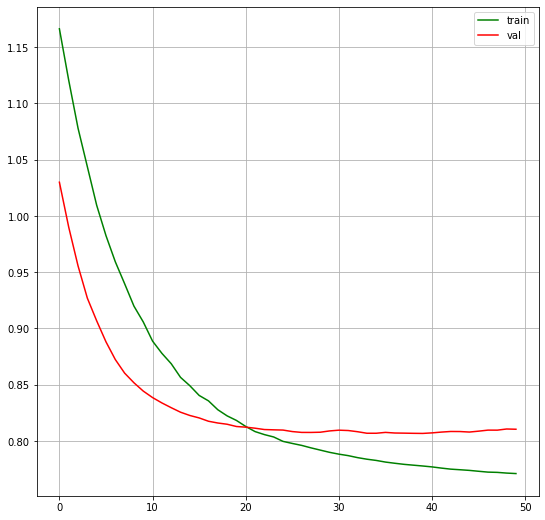

Plotting shap values...


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


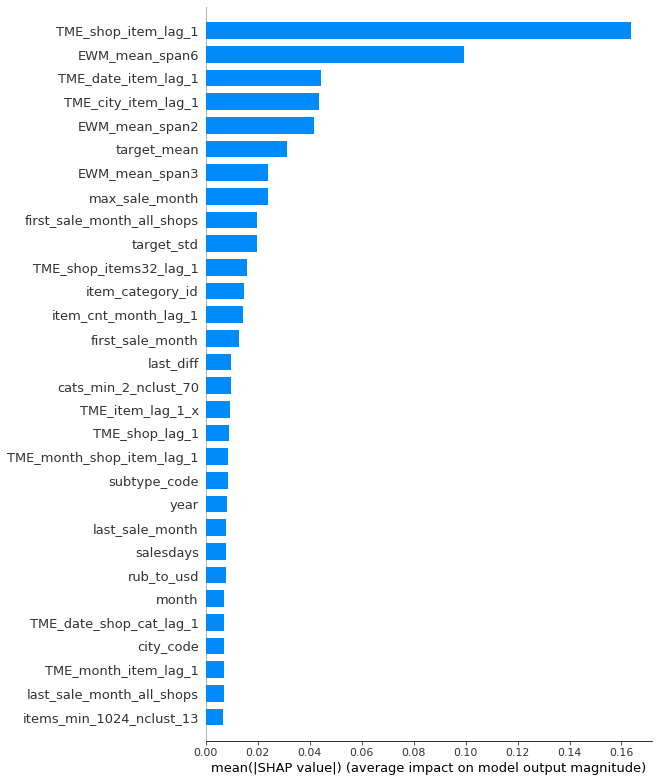

Wall time: 15min 2s


In [23]:
%%time
_, __, FI = LGBM(X,
         num_boost_round = 50,
         early_stopping_rounds = None,
         lambda_l2 = 10,
         learning_rate = 0.1,
         plot_error = True,
         plot_shap_type = 'bar',
         save_to_journal = False,
         save_subm_preds = False,
         test_name = 'New mean encodings')

Training model...
[500]	train's rmse: 0.820931	val's rmse: 0.790421
[1000]	train's rmse: 0.799479	val's rmse: 0.788196
LGBM: RMSE train: 0.7994221251843407  RMSE val: 0.7881139051392098


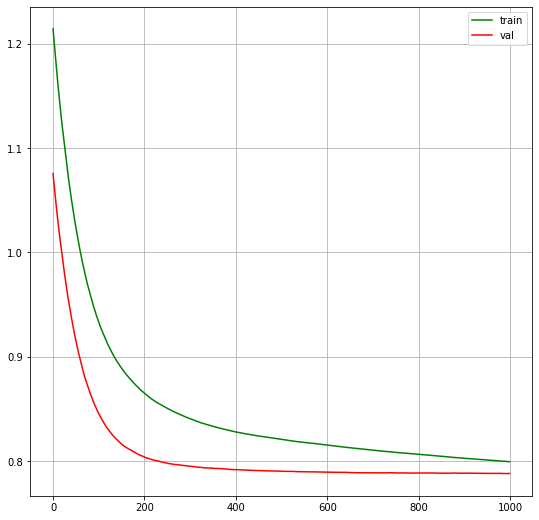

Plotting shap values...


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


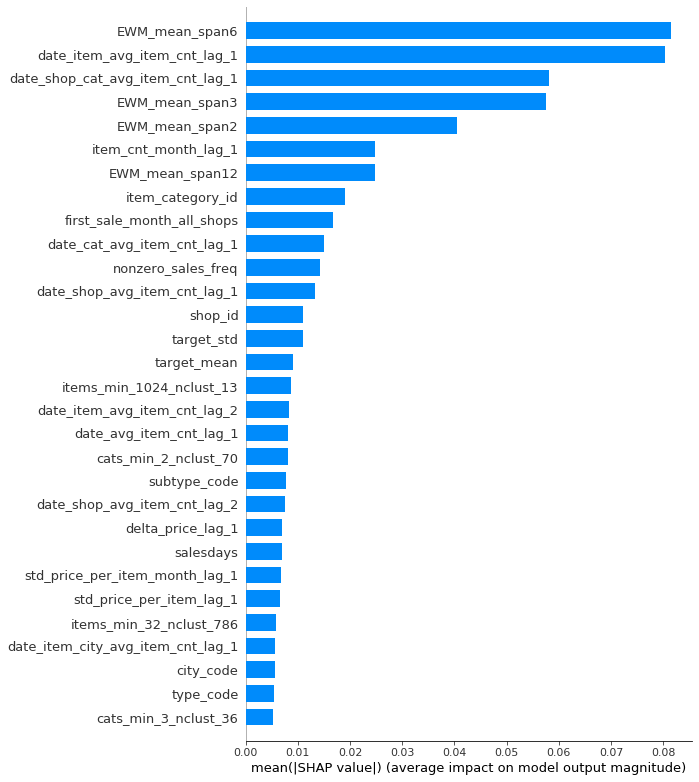

Wall time: 1h 52min 7s


In [6]:
%%time
_ = LGBM(X,
         num_boost_round = 1000,
         early_stopping_rounds = None,
         lambda_l2 = 10,
         learning_rate = 0.01,
         plot_error = True,
         plot_shap_type = 'bar',
         save_to_journal = True,
         save_subm_preds = False,
         test_name = 'test')

### Validation Scheme Selection
Let us see the training/validation error for expanding window validation sheme with a split for every month:
<img src="Figures/ExpWindowValidationScheme.png">

[200]	train's rmse: 0.725625	val's rmse: 0.918532
[200]	train's rmse: 0.766247	val's rmse: 1.02813
[200]	train's rmse: 0.794572	val's rmse: 0.952438
[200]	train's rmse: 0.806808	val's rmse: 0.959565
[200]	train's rmse: 0.810227	val's rmse: 1.19684
[200]	train's rmse: 0.849634	val's rmse: 0.940176
[200]	train's rmse: 0.832715	val's rmse: 0.883926
[200]	train's rmse: 0.827977	val's rmse: 0.942587
[200]	train's rmse: 0.829533	val's rmse: 0.852959
[200]	train's rmse: 0.823152	val's rmse: 0.805499
[200]	train's rmse: 0.817659	val's rmse: 0.748898
[200]	train's rmse: 0.809822	val's rmse: 0.736819
[200]	train's rmse: 0.799004	val's rmse: 0.829344
[200]	train's rmse: 0.799461	val's rmse: 0.89494
[200]	train's rmse: 0.798187	val's rmse: 0.852041
[200]	train's rmse: 0.796465	val's rmse: 0.944978
[200]	train's rmse: 0.799467	val's rmse: 1.11672
[200]	train's rmse: 0.81321	val's rmse: 0.817364
[200]	train's rmse: 0.812422	val's rmse: 0.784663
[200]	train's rmse: 0.809516	val's rmse: 0.752622
[200]

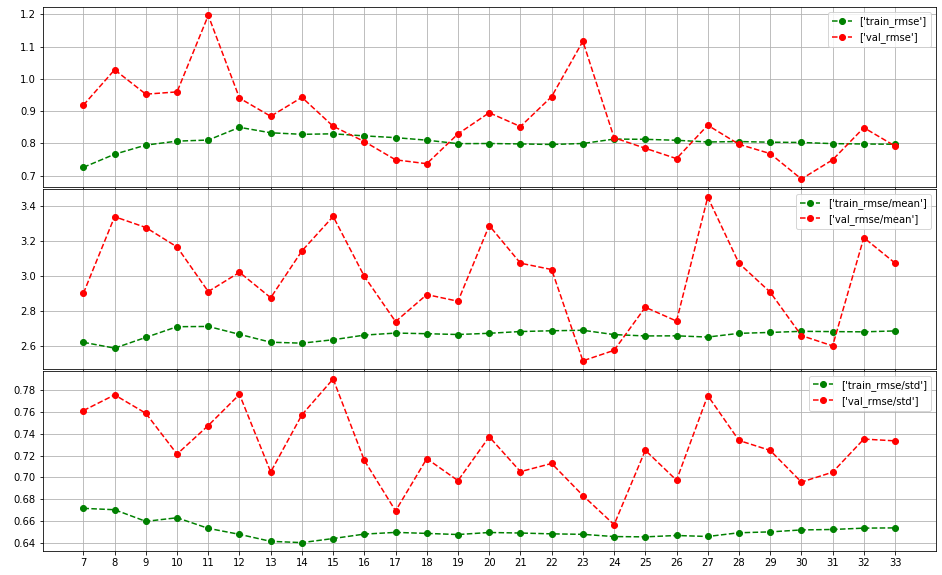

In [68]:
%%time
# DL mean encodings
error = LGBM_EXPANDING_WINDOW(X, min_month = 7, num_boost_round = 200, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05)

As we see, val error strongly depends on the month used for validation. Since we know that there is a variation of mean and std values for each month in the dataset (see below), it is expected that the train/val error will also deped on the month. We also plot normalized (by mean and std values) train and val rmse for comparison here. Overall there is a trend for validation error to go down as more data is used for training.
- Train error is quite stable, since adding just one month for train set in the expanding window scheme does not make much difference (except for the very first months). 
- Validation error vary depending on the month: with maximum in December and minimum during summer, which is in accordance with mean and std variation for the dataset. RMSE normalized to Std value shows the least volatile trend.
- RMSE error is used further with the training set: up to month 32, validation set month == 33 (October), test set month == 34 (November). With this said, it should overall be expected that val error (October) will be lower than test error (November) by ~ 0.1. E.g. Train error = 0.7, val error = 0.8, test error = 0.9.
- Rolling window scheme (results not shown here), with window size 12 or 6 showed slightly worse results than expanding window, so expanding window validation sheme will be used further.

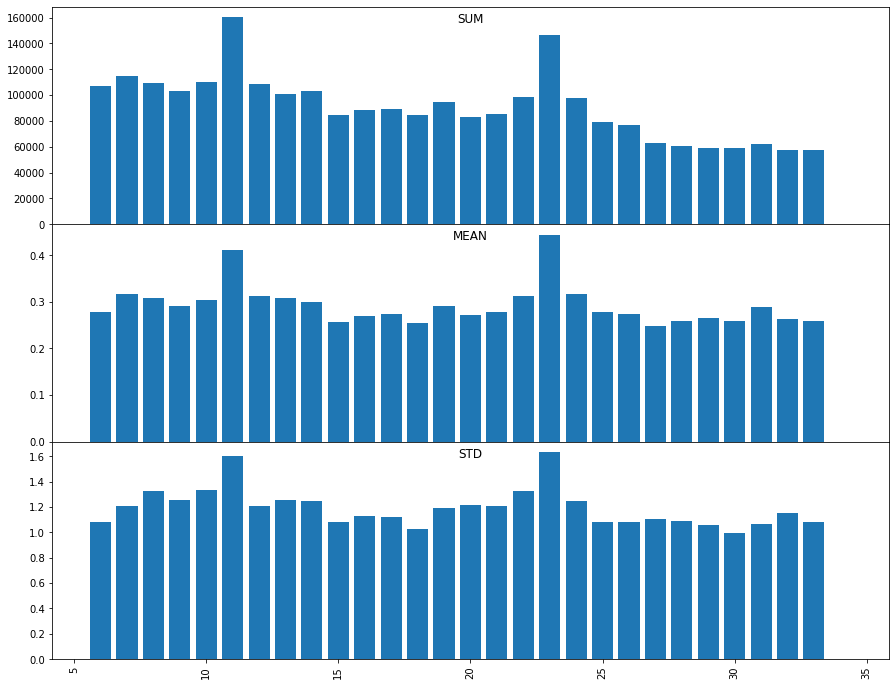

In [3]:
# Target statistics monthly variations:
groupby_and_plot(X, ['date_block_num'], 'item_cnt_month')

[200]	train's rmse: 1.39556	val's rmse: 2.16026
[200]	train's rmse: 1.42736	val's rmse: 3.41988
[200]	train's rmse: 1.51339	val's rmse: 2.38374
[200]	train's rmse: 1.53376	val's rmse: 2.62412
[200]	train's rmse: 1.57602	val's rmse: 2.10861
[200]	train's rmse: 1.58501	val's rmse: 1.37936
[200]	train's rmse: 1.56696	val's rmse: 1.75159
[200]	train's rmse: 1.56268	val's rmse: 2.06931
[200]	train's rmse: 1.57096	val's rmse: 1.82715
[200]	train's rmse: 1.57042	val's rmse: 2.30888
[200]	train's rmse: 1.57099	val's rmse: 1.79152
[200]	train's rmse: 1.57424	val's rmse: 1.34326
[200]	train's rmse: 1.54608	val's rmse: 1.63122
[200]	train's rmse: 1.53868	val's rmse: 2.44226
[200]	train's rmse: 1.55295	val's rmse: 1.89248
[200]	train's rmse: 1.55198	val's rmse: 2.25344
[200]	train's rmse: 1.55749	val's rmse: 1.77903
[200]	train's rmse: 1.55859	val's rmse: 0.915718
[200]	train's rmse: 1.55071	val's rmse: 1.70559
[200]	train's rmse: 1.54808	val's rmse: 1.63963
[200]	train's rmse: 1.54966	val's rmse:

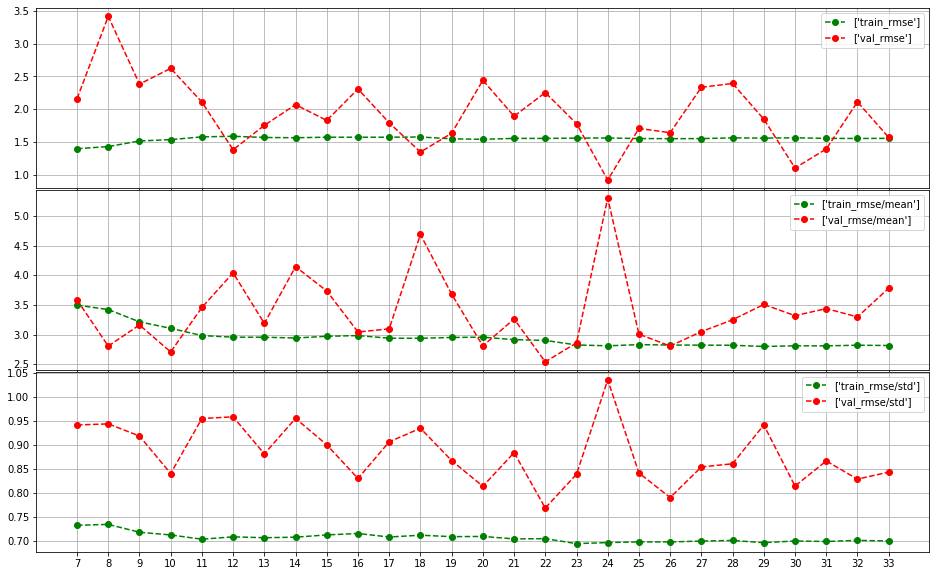

In [169]:
%%time
# X_new
error = LGBM_EXPANDING(X_new, min_month = 7, num_boost_round = 200, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05)

[200]	train's rmse: 0.374194	val's rmse: 0.305409
[200]	train's rmse: 0.365559	val's rmse: 0.300217
[200]	train's rmse: 0.357642	val's rmse: 0.329096
[200]	train's rmse: 0.354051	val's rmse: 0.328228
[200]	train's rmse: 0.350232	val's rmse: 0.486212
[200]	train's rmse: 0.358706	val's rmse: 0.299174
[200]	train's rmse: 0.352443	val's rmse: 0.325894
[200]	train's rmse: 0.34934	val's rmse: 0.407171
[200]	train's rmse: 0.34948	val's rmse: 0.334946
[200]	train's rmse: 0.347531	val's rmse: 0.287197
[200]	train's rmse: 0.344355	val's rmse: 0.274801
[200]	train's rmse: 0.341029	val's rmse: 0.298867
[200]	train's rmse: 0.33819	val's rmse: 0.308169
[200]	train's rmse: 0.337046	val's rmse: 0.268025
[200]	train's rmse: 0.334448	val's rmse: 0.350976
[200]	train's rmse: 0.333677	val's rmse: 0.311672
[200]	train's rmse: 0.33236	val's rmse: 0.501892
[200]	train's rmse: 0.338474	val's rmse: 0.305776
[200]	train's rmse: 0.336058	val's rmse: 0.33602
[200]	train's rmse: 0.335418	val's rmse: 0.249642
[200]

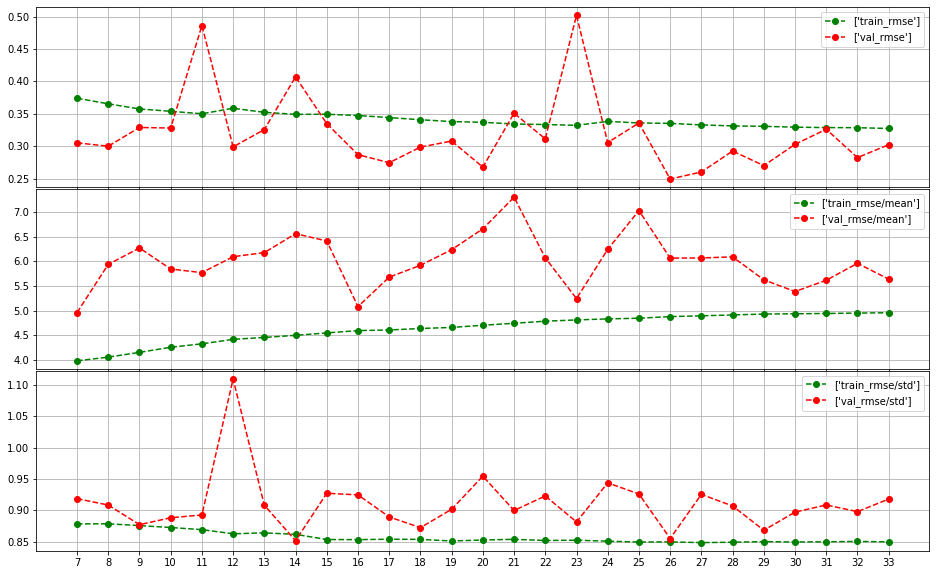

In [170]:
%%time
# X_no_itemshop_sales
error = LGBM_EXPANDING(X_no_itemshop_sales, min_month = 7, num_boost_round = 200, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05)

[200]	train's rmse: 1.0547	val's rmse: 1.0377
[200]	train's rmse: 1.0347	val's rmse: 0.936322
[200]	train's rmse: 1.00836	val's rmse: 0.954732
[200]	train's rmse: 0.988078	val's rmse: 0.986709
[200]	train's rmse: 0.972861	val's rmse: 1.42168
[200]	train's rmse: 0.997849	val's rmse: 1.1834
[200]	train's rmse: 0.988323	val's rmse: 1.01666
[200]	train's rmse: 0.981855	val's rmse: 0.972253
[200]	train's rmse: 0.971703	val's rmse: 0.863296
[200]	train's rmse: 0.956056	val's rmse: 0.798927
[200]	train's rmse: 0.945371	val's rmse: 0.849331
[200]	train's rmse: 0.934351	val's rmse: 0.850767
[200]	train's rmse: 0.926611	val's rmse: 0.935385
[200]	train's rmse: 0.924152	val's rmse: 0.856358
[200]	train's rmse: 0.918129	val's rmse: 0.890325
[200]	train's rmse: 0.911361	val's rmse: 0.883716
[200]	train's rmse: 0.908033	val's rmse: 1.31416
[200]	train's rmse: 0.921471	val's rmse: 1.03683
[200]	train's rmse: 0.921877	val's rmse: 0.914441
[200]	train's rmse: 0.919152	val's rmse: 0.806583
[200]	train's

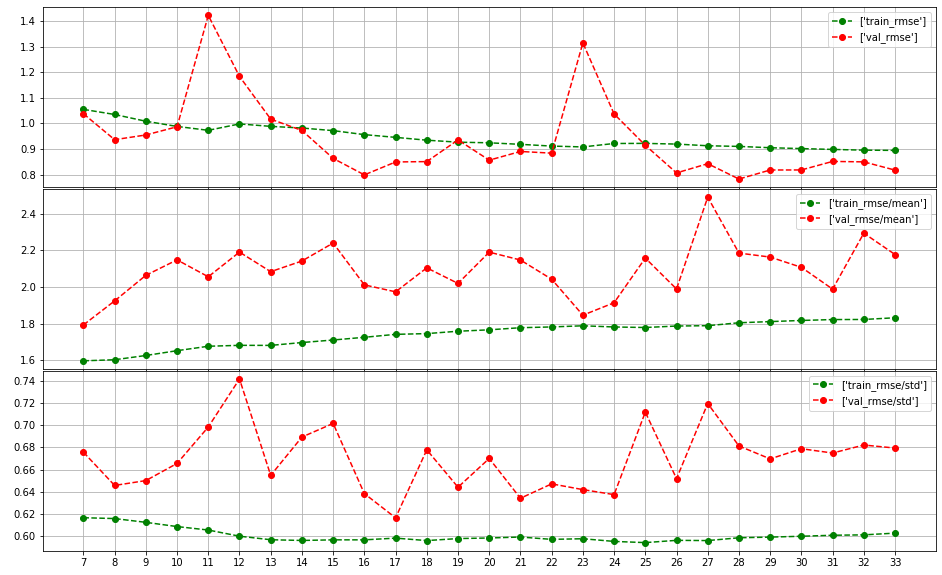

In [171]:
%%time
# X_timeseries
error = LGBM_EXPANDING(X_timeseries, min_month = 7, num_boost_round = 200, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05)

In [8]:
X.head()

,date_block_num,shop_id,item_id,item_cnt_month,year,month,days,busdays,holidays,salesdays,mo,tu,we,th,fr,sa,su,city_code,item_category_id,items_min_1024_nclust_13,items_min_512_nclust_30,items_min_256_nclust_62,items_min_128_nclust_122,items_min_64_nclust_297,items_min_32_nclust_786,items_min_16_nclust_2029,items_min_8_nclust_4941,items_min_4_nclust_14155,type_code,subtype_code,cats_min_2_nclust_70,cats_min_3_nclust_36,cats_min_4_nclust_20,cats_min_5_nclust_17,first_sale_month_all_shops,last_sale_month_all_shops,first_sale_month,last_sale_month,max_sale_month,no_item_shop_sales,new_item,nonzero_sales_freq,target_mean,target_std,target_std_to_mean,EWM_mean_span2,EWM_mean_span3,EWM_mean_span6,EWM_mean_span12,item_cnt_month_lag_1,item_cnt_month_lag_12,item_cnt_month_lag_24,last_diff,delta_price_lag_1,delta_price_shop_lag_1,rub_to_usd,std_price_per_item_lag_1,mean_price_per_item_lag_1,min_price_per_item_lag_1,max_price_per_item_lag_1,std_price_per_item_month_lag_1,mean_price_per_item_month_lag_1,min_price_per_item_month_lag_1,max_price_per_item_month_lag_1,std_price_per_item_month_shop_lag_1,mean_price_per_item_month_shop_lag_1,min_price_per_item_month_shop_lag_1,max_price_per_item_month_shop_lag_1,date_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_item_avg_item_cnt_lag_4,date_item_avg_item_cnt_lag_5,date_item_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_4,date_shop_avg_item_cnt_lag_5,date_shop_avg_item_cnt_lag_6,date_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1
2262708,6,2,27,0.0,2013,7,31,23,0,31,5,5,5,4,4,4,4,0,19,7,19,28,34,219,222,915,79,8116,5,10,38,18,12,10,6.0,1.0,6.0,6.0,6.0,0,0,0.166667,0.166667,0.408248,2.449490,0.002747,0.015873,0.061260,0.105426,0.0,NaN,NaN,0.0,-0.043271,NaN,32.768906,609.841614,1461.228516,498.000000,2499.0,0.000000,1398.000000,1398.000000,1398.0,NaN,NaN,NaN,NaN,0.282445,0.057143,0.027027,0.025641,0.121212,0.078947,0.129032,0.094130,0.064565,0.071141,0.092534,0.062346,0.138012,0.835376,0.591837,0.094130,0.299272
2262709,6,2,28,0.0,2013,7,31,23,0,31,5,5,5,4,4,4,4,0,30,4,24,15,90,141,111,1002,2902,9032,8,55,9,11,11,9,6.0,1.0,NaN,NaN,NaN,1,0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,0.0,-0.038742,NaN,32.768906,118.175812,310.010468,126.000000,549.0,0.000000,298.000000,298.000000,298.0,NaN,NaN,NaN,NaN,0.282445,0.081081,0.055556,0.093750,0.162162,0.194444,0.125000,0.094130,0.063259,0.070825,0.092534,0.058564,0.139642,1.093458,0.393822,0.094130,0.299272
2262710,6,2,29,0.0,2013,7,31,23,0,31,5,5,5,4,4,4,4,0,23,7,25,47,21,33,538,569,1618,12208,5,16,26,26,14,12,6.0,2.0,NaN,NaN,NaN,1,0,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,32.768906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031250,NaN,NaN,NaN,0.051282,NaN,0.068888,NaN,NaN,NaN,0.144170,NaN,NaN,NaN,NaN
2262711,6,2,30,0.0,2013,7,31,23,0,31,5,5,5,4,4,4,4,0,40,1,0,1,2,7,1,6,1734,5087,11,4,12,16,9,6,5.0,1.0,4.0,1.0,4.0,0,0,0.400000,0.400000,0.547723,1.369306,0.694215,0.580645,0.478877,0.436297,1.0,NaN,NaN,1.0,0.232702,0.0,32.768906,105.936668,323.679199,99.000000,399.0,0.000000,399.000000,399.000000,399.0,NaN,399.0,399.0,399.0,0.283067,1.277778,1.000000,2.500000,8.323529,13.323529,NaN,0.093833,0.063259,0.072108,0.094633,0.062346,NaN,0.219820,0.023109,0.093833,0.299272
2262712,6,2,31,0.0,2013,7,31,23,0,31,5,5,5,4,4,4,4,0,37,2,7,2,8,1,2,2,1734,5087,11,1,3,9,9,6,5.0,1.0,5.0,3.0,5.0,0,0,0.600000,1.200000,1.643168,1.369306,0.132231,0.322581,0.672416,0.916239,0.0,NaN,NaN,0.0,0.208018,NaN,32.768906,153.321487,578.630005,147.619995,699.0,0.020851,698.995667,698.900024,699.0,NaN,NaN,NaN,NaN,0.284147,0.600000,0.705882,1.081081,4.315790,11.666667,NaN,0.098641,0.066926,0.072118,0.090432,0.060768,NaN,0.183606,0.028481,0.098641,0.299272


## Split Data to 3 groups

Let us try to split the data to 3 groups in accordance with the idea of Konstantin (see comments here: https://www.kaggle.com/kyakovlev/1st-place-solution-part-1-hands-on-data), who noticed that we have 3 different types of data in the dataset:
1. New_items - those are items, that were never met before in the dataset
2. No_item_shop_sales items - these are item-shop pairs with items that were sold before but in some other shop
3. Timeseries - these are item-shop pairs that have some previous sales history for this particular item-shop pair. This is more or less classic time series data. 

In [25]:
# We definitly need to through away first several months because it is not clear which items are new or old for the first months
X = X[X.date_block_num > 5]
print('X:', len(X), 'elements, 100 %,', 'mean target = ', np.round(X.item_cnt_month.mean(), 2))
print()
X_new = X[X.new_item == 1]
print('X_new len:', len(X_new), 'elements, ', np.round(100*len(X_new)/len(X)), '%,', 'mean target = ', np.round(X_new.item_cnt_month.mean(),2))
print()
X_no_item_shop_sales = X[(X.no_item_shop_sales==1) & (X.new_item==0)]
print('X_no_item_shop_sales:', len(X_no_item_shop_sales),  'elements, ', np.round(100*len(X_no_item_shop_sales)/len(X)), '%,', 'mean target = ', np.round(X_no_item_shop_sales.item_cnt_month.mean(),2))
print()
X_timeseries = X[(X.no_item_shop_sales==0) & (X.new_item==0)]
print('X_timeseries:',len(X_timeseries), 'elements, ', np.round(100*len(X_timeseries)/len(X)), '%,', 'mean target = ', np.round(X_timeseries.item_cnt_month.mean(), 2))

# Assert that we don't loose any elements or duplicate them
assert len(X) == len(X_new)+len(X_no_item_shop_sales)+len(X_timeseries)

# Save datasets indices to use them later to combine predictions together and use for submission
X_new_test_indices = X_new[X_new.date_block_num == 34].index
X_no_item_shop_sales_test_indices = X_no_item_shop_sales[X_no_item_shop_sales.date_block_num == 34].index
X_timeseries_test_indices = X_timeseries[X_timeseries.date_block_num == 34].index

X: 8592239 elements, 100 %, mean target =  0.3

X_new len: 513156 elements,  6.0 %, mean target =  0.6

X_no_item_shop_sales: 3671547 elements,  43.0 %, mean target =  0.06

X_timeseries: 4407536 elements,  51.0 %, mean target =  0.46


- new_items dataset is quite small (6%), which is expected with about only 300 new items appear every month. The other two datasets comprise 43% and 51% of all elements. 
- target mean is higher for new items, than for timeseries items - which is probably expected for new items in sales

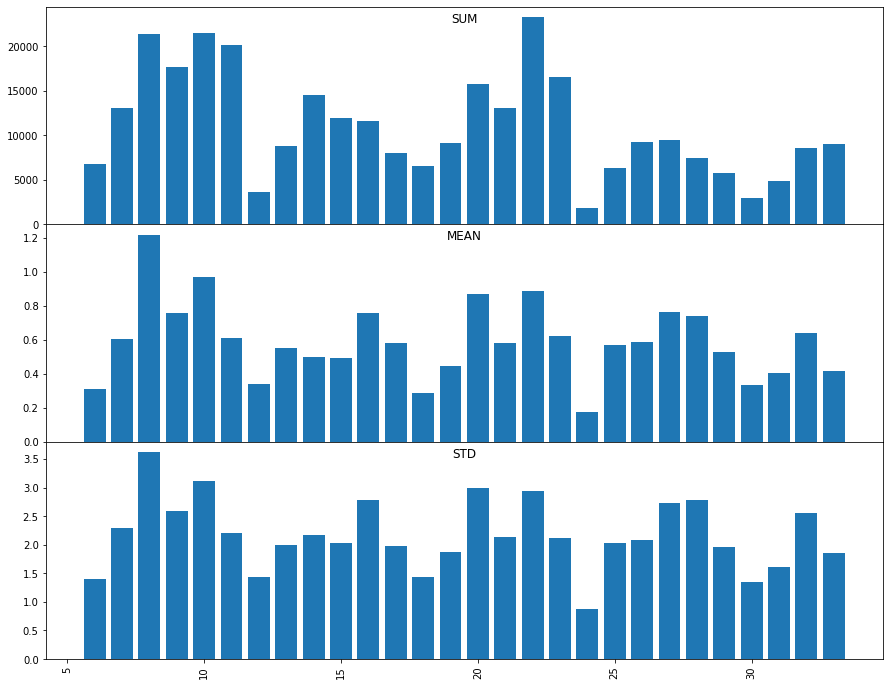

In [103]:
groupby_and_plot(X_new, ['date_block_num'], 'item_cnt_month')

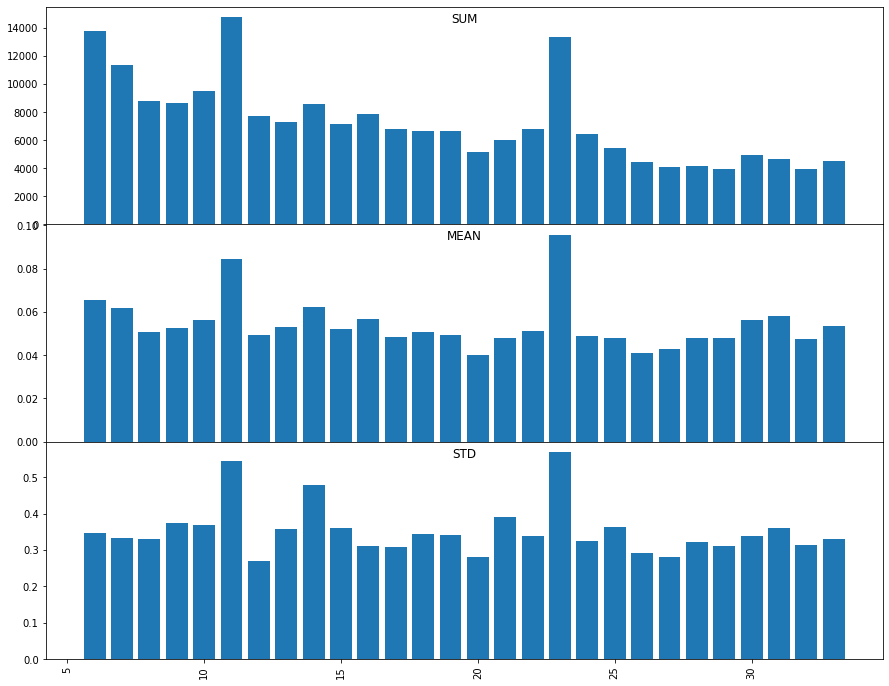

In [104]:
groupby_and_plot(X_no_item_shop_sales, ['date_block_num'], 'item_cnt_month')

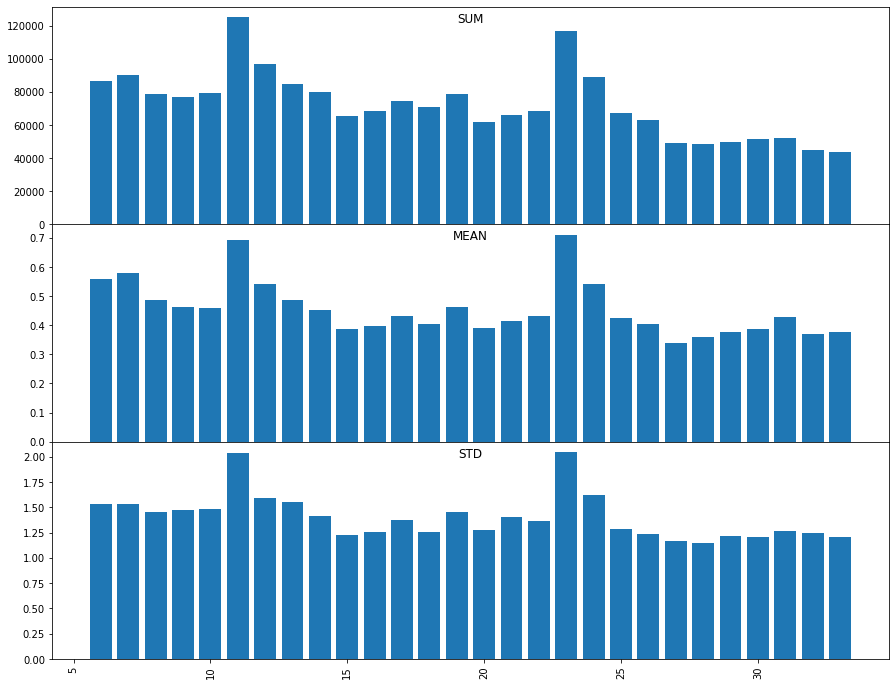

In [105]:
groupby_and_plot(X_timeseries, ['date_block_num'], 'item_cnt_month')

Due to small amount of data there are a lot of volatility in statistics parameters in the New_items dataset. Apparently, it would be hardet to get predictions for New items than for the other two datasets.

Training model...
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[50]	train's rmse: 1.71509	val's rmse: 1.54712
LGBM: RMSE train: 1.7139030650886997  RMSE val: 1.5463541707679656


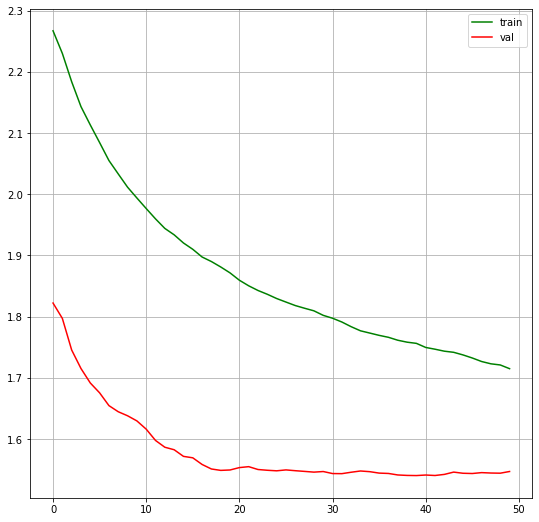

Plotting shap values...


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


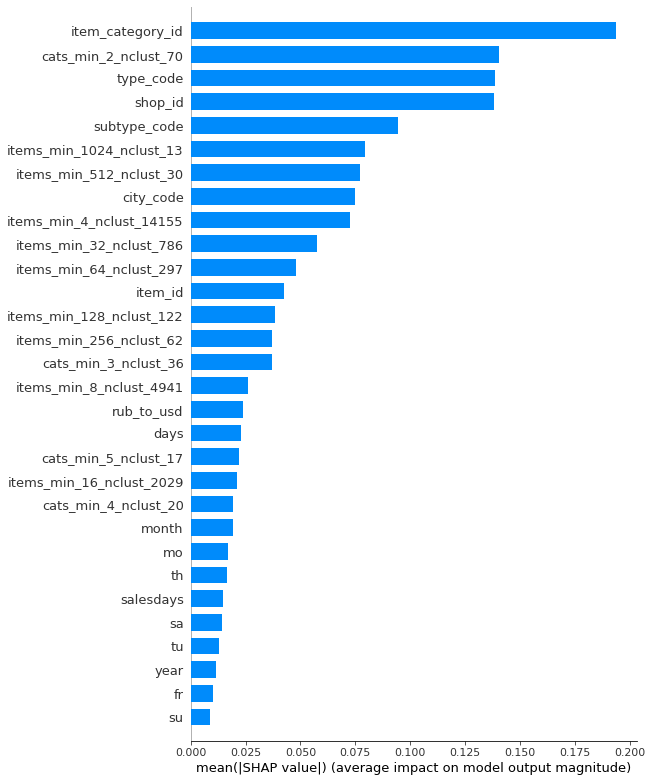

Wall time: 30.3 s


In [26]:
%%time
y_pred_train, y_pred_val, feature_importance = LGBM(X_new,
         num_boost_round = 50,
         early_stopping_rounds = 50,
         lambda_l2 = 10,
         learning_rate = 0.1,
         plot_error = True,
         plot_shap_type = 'bar',
         save_to_journal = False,
         save_subm_preds = False,
         test_name = 'test')

Training model...
Training until validation scores don't improve for 50 rounds
[500]	train's rmse: 1.69517	val's rmse: 1.52866
Early stopping, best iteration is:
[498]	train's rmse: 1.69611	val's rmse: 1.52791
LGBM: RMSE train: 1.695436332040203  RMSE val: 1.5273995217618435


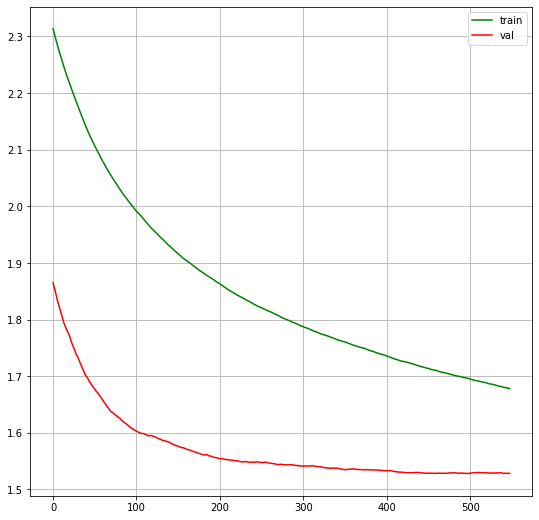

Plotting shap values...


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


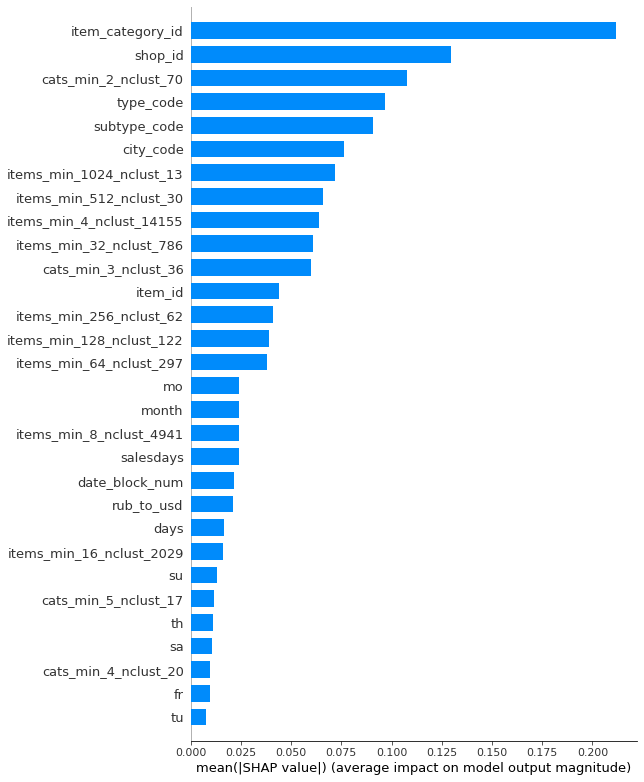

Wall time: 3min 23s


In [49]:
%%time
y_pred_train, y_pred_val, feature_importance = LGBM(X_new,
         num_boost_round = 1000,
         early_stopping_rounds = 50,
         lambda_l2 = 10,
         learning_rate = 0.01,
         plot_error = True,
         plot_shap_type = 'bar',
         save_to_journal = True,
         save_subm_preds = False,
         test_name = 'test')

Training model...
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[50]	train's rmse: 0.263974	val's rmse: 0.313673
LGBM: RMSE train: 0.26394085944164547  RMSE val: 0.3135814695528905


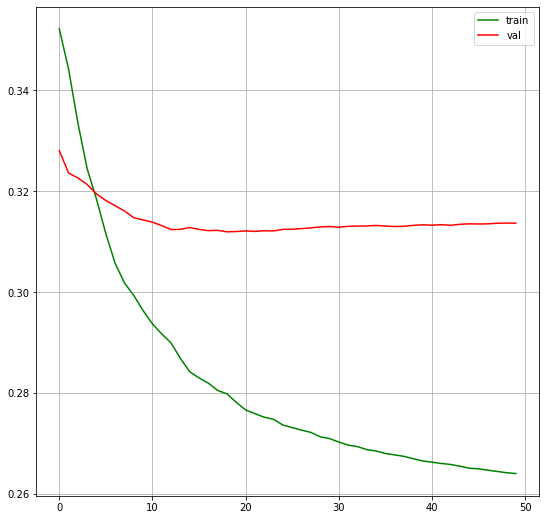

Plotting shap values...


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


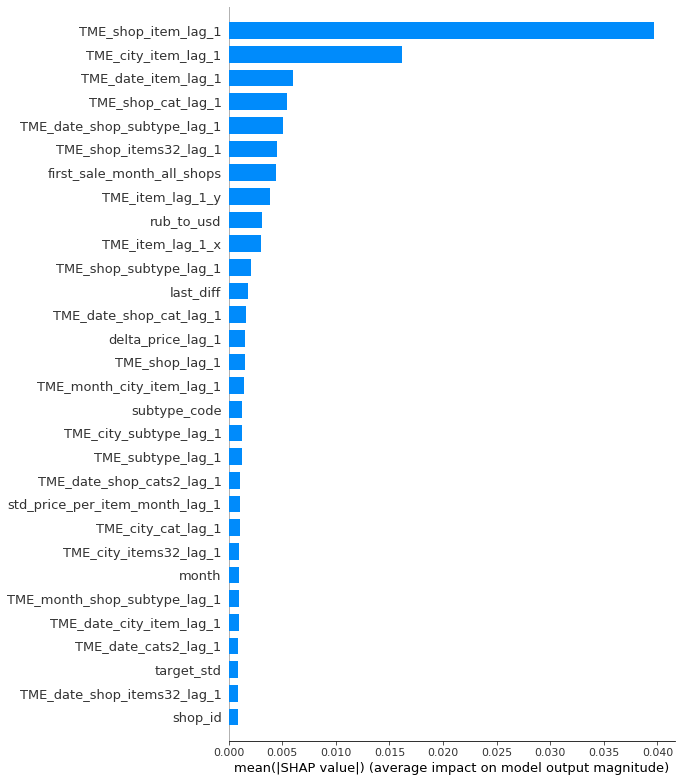

Wall time: 3min 56s


In [27]:
%%time
y_pred_train, y_pred_val, feature_importance_no = LGBM(X_no_item_shop_sales,
         num_boost_round = 50,
         early_stopping_rounds = 50,
         lambda_l2 = 10,
         learning_rate = 0.1,
         plot_error = True,
         plot_shap_type = 'bar',
         save_to_journal = True,
         save_subm_preds = False,
         test_name = 'test')

In [119]:
feature_importance_no.head(99)

,col_name,feature_importance_vals
97,TME_shop_item_lag_1,0.037383
104,TME_city_item_lag_1,0.019013
0,date_block_num,0.008849
113,TME_date_shop_subtype_lag_1,0.004751
103,TME_shop_items32_lag_1,0.004550
83,TME_date_item_lag_1,0.004441
33,first_sale_month_all_shops,0.003796
71,TME_item_lag_1_x,0.003503
98,TME_shop_cat_lag_1,0.003258
99,TME_shop_subtype_lag_1,0.002821


Training model...
Training until validation scores don't improve for 50 rounds
[500]	train's rmse: 0.313991	val's rmse: 0.302001
Early stopping, best iteration is:
[531]	train's rmse: 0.31332	val's rmse: 0.30195
LGBM: RMSE train: 0.31330921380029664  RMSE val: 0.30192895183425084


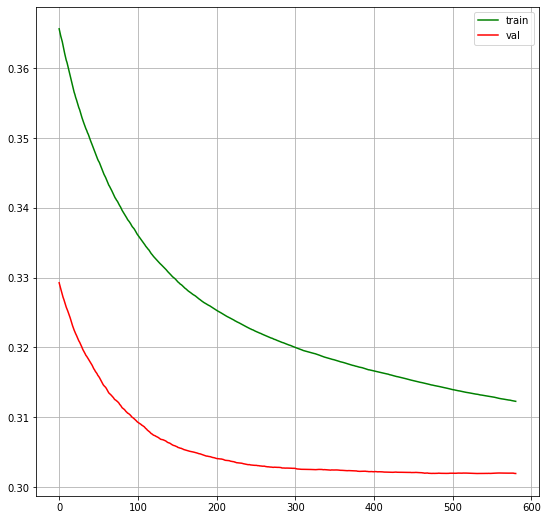

Plotting shap values...


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


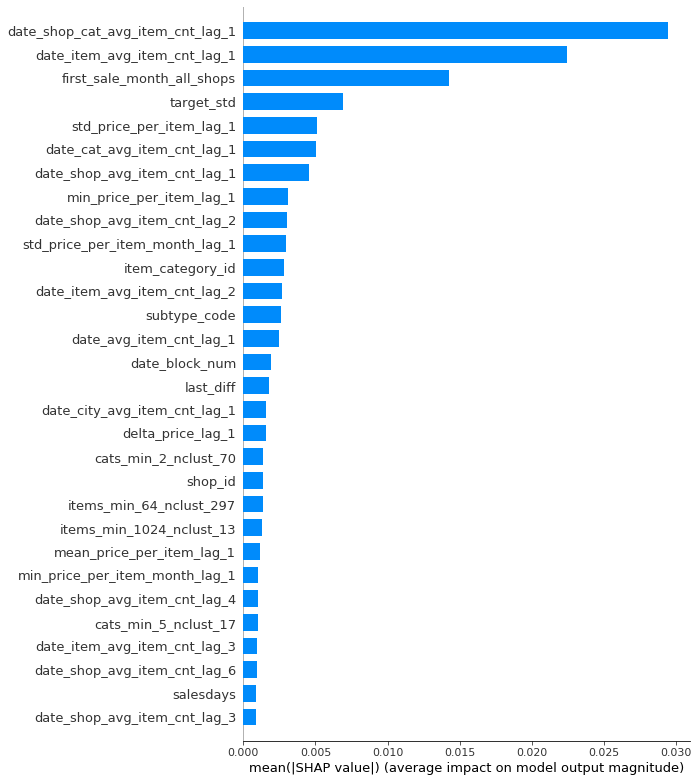

Wall time: 22min 37s


In [88]:
%%time
y_pred_train, y_pred_val, feature_importance = LGBM(X_no_item_shop_sales,
         num_boost_round = 1000,
         early_stopping_rounds = 50,
         lambda_l2 = 10,
         learning_rate = 0.01,
         plot_error = True,
         plot_shap_type = 'bar',
         save_to_journal = True,
         save_subm_preds = False,
         test_name = 'test')

Training model...
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	train's rmse: 0.847194	val's rmse: 0.854956
LGBM: RMSE train: 0.8471936209249047  RMSE val: 0.8549560443794005


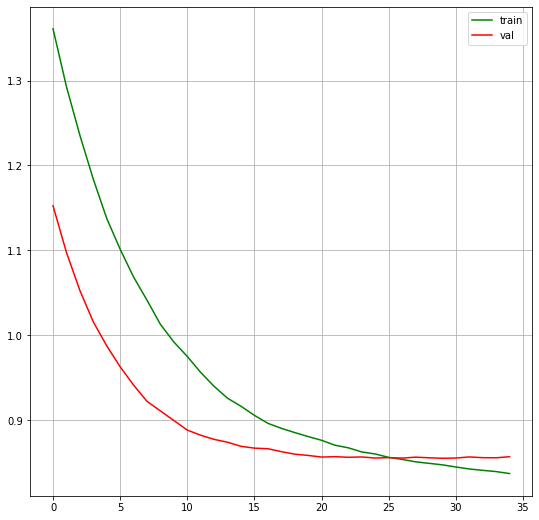

Plotting shap values...


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


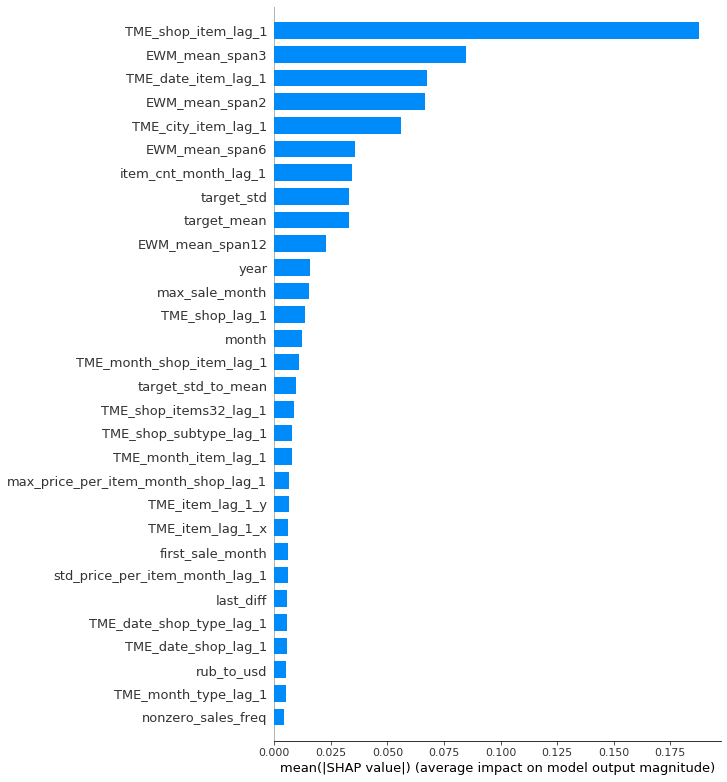

Wall time: 4min 40s


In [31]:
%%time
y_pred_train, y_pred_val, feature_importance_timeseries = LGBM(X_timeseries,
         num_boost_round = 50,
         early_stopping_rounds = 5,
         lambda_l2 = 10,
         learning_rate = 0.1,
         plot_error = True,
         plot_shap_type = 'bar',
         save_to_journal = False,
         save_subm_preds = False,
         test_name = 'test')

In [29]:
feature_importance_timeseries.head(99)

,col_name,feature_importance_vals
44,EWM_mean_span3,2.831528e-03
96,TME_shop_item_lag_1,2.803400e-03
40,target_mean,6.443789e-04
47,item_cnt_month_lag_1,4.947942e-04
36,max_sale_month,2.577758e-04
2,year,2.131092e-04
58,std_price_per_item_month_lag_1,1.571407e-04
34,first_sale_month,1.513526e-04
89,TME_month_item_lag_1,1.367482e-04
42,target_std_to_mean,1.040959e-04


Training model...
Training until validation scores don't improve for 50 rounds
[500]	train's rmse: 0.904319	val's rmse: 0.817655
Early stopping, best iteration is:
[780]	train's rmse: 0.887939	val's rmse: 0.815359
LGBM: RMSE train: 0.887918354349858  RMSE val: 0.8153554783830087


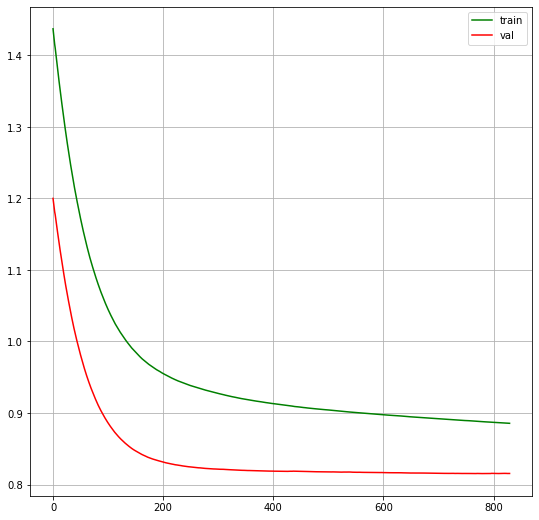

Plotting shap values...


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


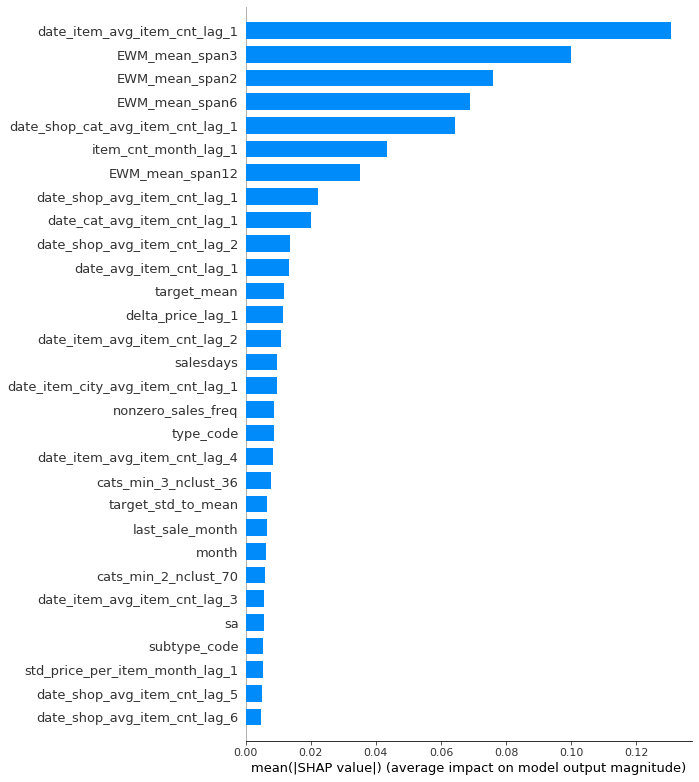

Wall time: 38min 17s


In [97]:
%%time
y_pred_train, y_pred_val, feature_importance = LGBM(X_timeseries,
         num_boost_round = 1000,
         early_stopping_rounds = 50,
         lambda_l2 = 10,
         learning_rate = 0.01,
         plot_error = True,
         plot_shap_type = 'bar',
         save_to_journal = True,
         save_subm_preds = False,
         test_name = 'test')

In [393]:
preds_X_new = pd.DataFrame(data = zip(X_new_test_indices, y_pred_test_new)).set_index(0).rename(columns={1: 'item_cnt_month'}).rename_axis('ID')
preds_X_no_itemshop_sales = pd.DataFrame(data = zip(X_no_itemshop_sales_test_indices, y_pred_test_no_itemshop_sales)).set_index(0).rename(columns={1: 'item_cnt_month'}).rename_axis('ID')
preds_X_timeseries = pd.DataFrame(data = zip(X_timeseries_test_indices, y_pred_test_timeseries)).set_index(0).rename(columns={1: 'item_cnt_month'}).rename_axis('ID')

display(print(len(preds_X_new)), preds_X_new.tail(),
        print(len(preds_X_no_itemshop_sales)), preds_X_no_itemshop_sales.tail(),
        print(len(preds_X_timeseries)), preds_X_timeseries.tail())

df =  pd.concat([preds_X_new, preds_X_no_itemshop_sales, preds_X_timeseries]).sort_index()
df = df.reset_index()
df['ID'] = range(0, len(df))
df.to_csv(r'output/submissions/Split_to_3_no first month.csv', index=False)
df.tail()

16952
85819
111429


None

,item_cnt_month
ID,
11069077,0.075025
11069097,0.152959
11069101,0.145268
11069108,0.000000
11069120,0.027431


None

,item_cnt_month
ID,
11069135,0.008760
11069136,0.035890
11069141,0.041404
11069143,0.019535
11069145,0.012436


None

,item_cnt_month
ID,
11069139,0.045604
11069140,0.119675
11069142,0.113303
11069144,0.048974
11069146,0.037761


,ID,item_cnt_month
214195,214195,0.113303
214196,214196,0.019535
214197,214197,0.048974
214198,214198,0.012436
214199,214199,0.037761


In [33]:
%%time
y_pred_train, y_pred_val, y_pred_test = LGBM(X, 'my mean enc features_kf5 alpha5 500_None_10_0.05_retrain for train and val_', num_boost_round = 500, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05, retrain = True, plot = False)

[500]	train's rmse: 0.773065	val's rmse: 0.792808
LGBM: RMSE train: 0.7728260730946798  RMSE val: 0.7925275565648959
[500]	trainval's rmse: 0.774487
LGBM: RMSE train and val: 0.7742565730231389
Wall time: 33min 13s


In [87]:
%%time
y_pred_train, y_pred_val, y_pred_test = LGBM(X, 'my mean enc features 500_None_10_0.05_retrain for train and val', num_boost_round = 500, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05, retrain = True, plot = False)

[500]	train's rmse: 0.75256	val's rmse: 0.796365
LGBM: RMSE train: 0.7522565759883805  RMSE val: 0.7960185598861328
[500]	trainval's rmse: 0.751163
LGBM: RMSE train and val: 0.750878410597601
Wall time: 19min 40s


[500]	train's rmse: 0.739057	val's rmse: 0.777908
LGBM: RMSE train: 0.7387364167016872  RMSE val: 0.7775766818083519


C:\Users\edyshlyu\OneDrive - Imperial College London\ML\2019.10.23_Top Kagglers Course\Solution\libraries_and_functions.py:163: RuntimeWarning: invalid value encountered in true_divide
  harmonic_mean = np.round(2*split_fraction*gain_fraction/((split_fraction+gain_fraction)), 1)


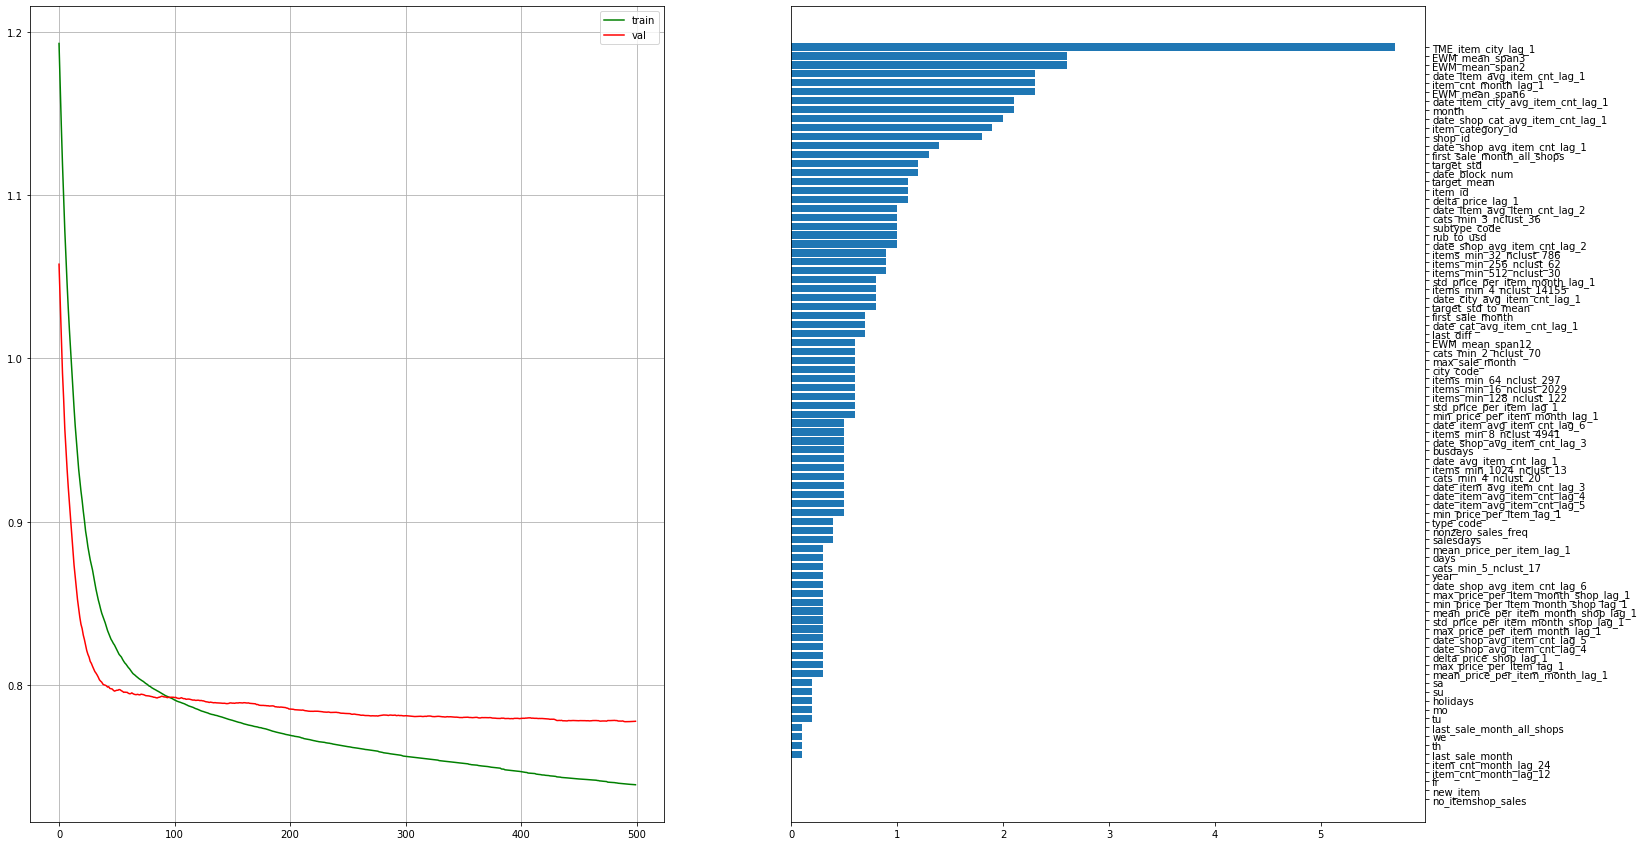

Wall time: 11min 25s


In [52]:
%%time
y_pred_train, y_pred_val, y_pred_test = LGBM(X, 'DL_mean_enc 500_None_10_0.05_True ItemCity added', num_boost_round = 500, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05, retrain = False, plot = True)

[500]	train's rmse: 0.764765	val's rmse: 0.77982
LGBM: RMSE train: 0.7645011226397512  RMSE val: 0.7795466540167706


C:\Users\edyshlyu\OneDrive - Imperial College London\ML\2019.10.23_Top Kagglers Course\Solution\libraries_and_functions.py:145: RuntimeWarning: invalid value encountered in true_divide
  harmonic_mean = np.round(2*split_fraction*gain_fraction/((split_fraction+gain_fraction)), 1)


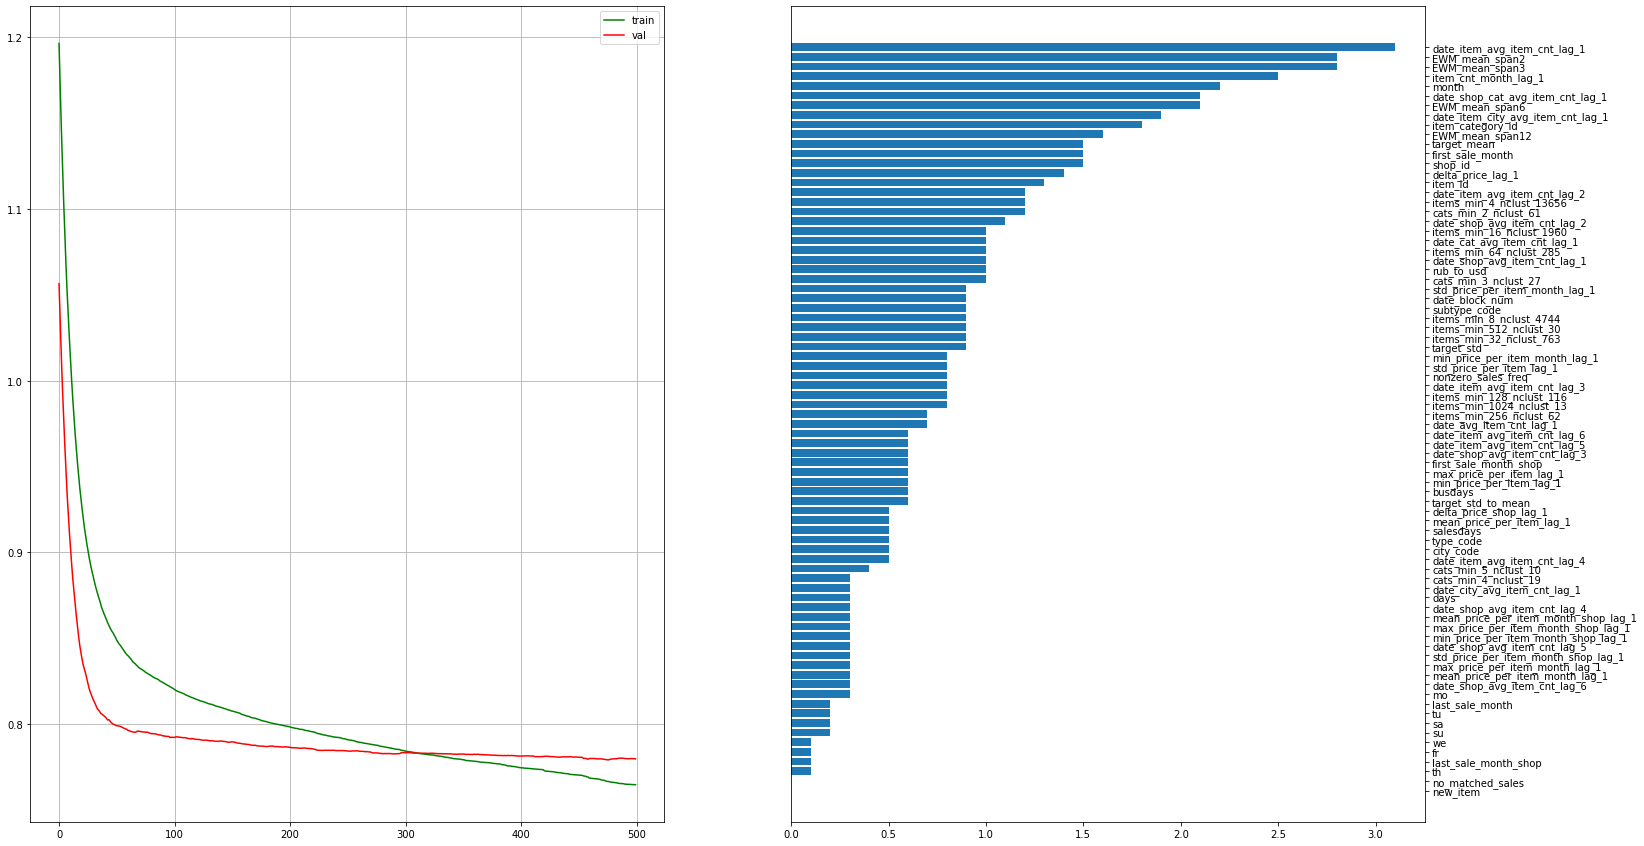

Wall time: 11min 42s


In [20]:
%%time
y_pred_train, y_pred_val, y_pred_test = LGBM(X, 'DL_mean_enc 500_None_10_0.05_TargetStat features', num_boost_round = 500, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05, retrain = False, plot = True)

In [82]:
%%time
y_pred_train, y_pred_val, y_pred_test = LGBM(X, 'DL mean enc features 500_None_10_0.05_retrain for train and val', num_boost_round = 500, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05, retrain = True, plot = False)

[500]	train's rmse: 0.76468	val's rmse: 0.783303
LGBM: RMSE train: 0.7644085166862907  RMSE val: 0.7829011541937101
[500]	trainval's rmse: 0.762138
LGBM: RMSE train and val: 0.7618747025905452
Wall time: 20min 5s


LGBM: RMSE train: 0.7644085166862907  RMSE val: 0.7829011541937101


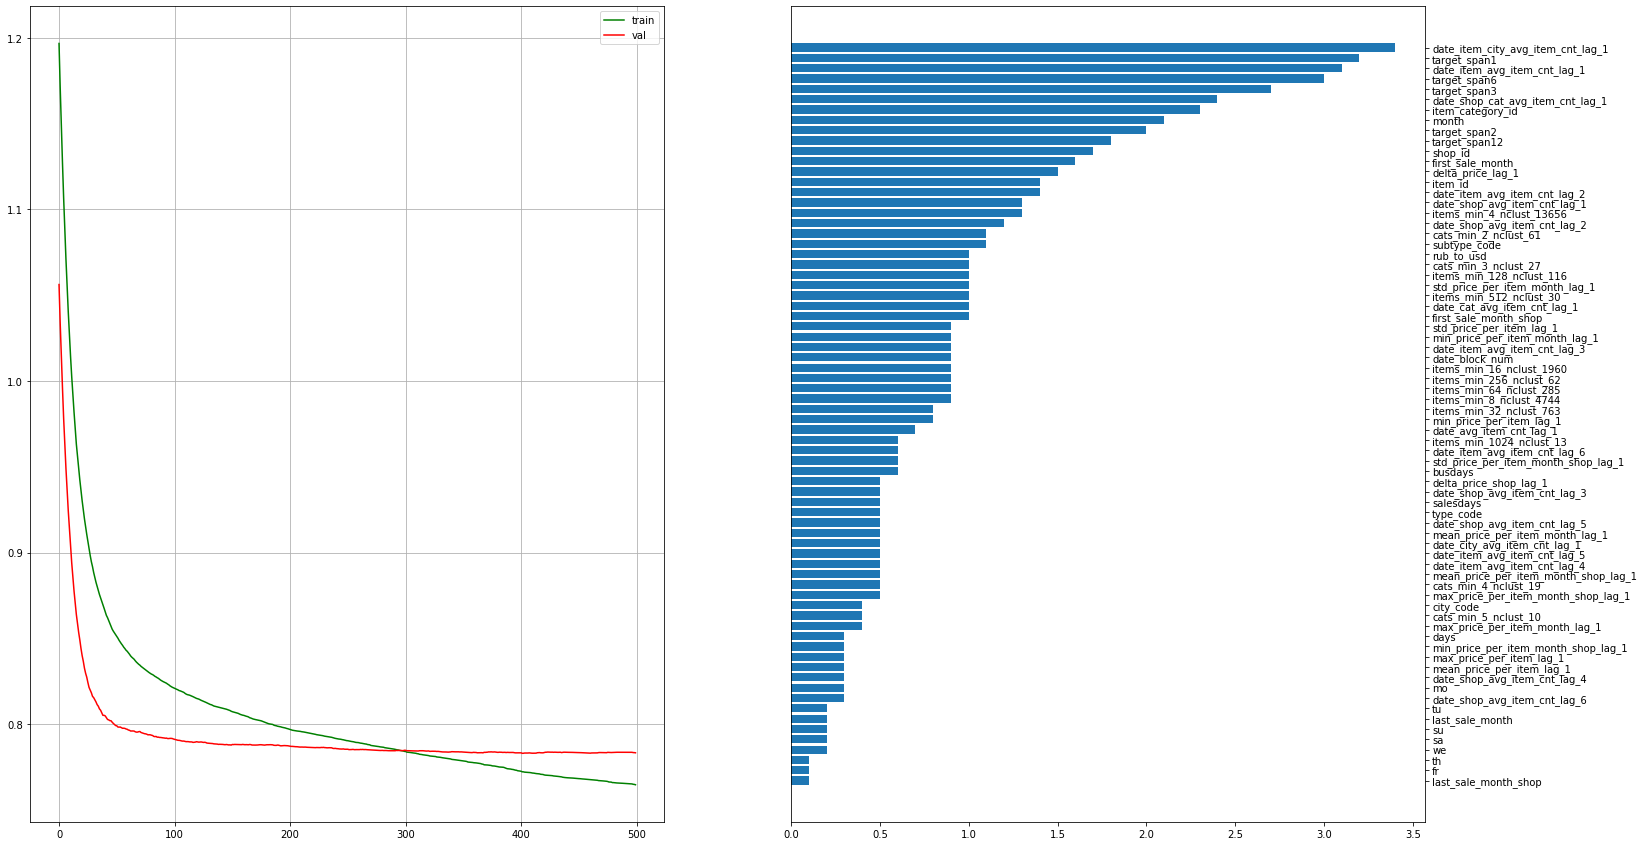

Wall time: 10min 4s


In [57]:
%%time
y_pred_train, y_pred_val, y_pred_test = LGBM(X, 'DL mean enc features 500_None_10_0.05', num_boost_round = 500, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05)

LGBM: RMSE train: 0.7636067643536821  RMSE val: 0.7849508093333135


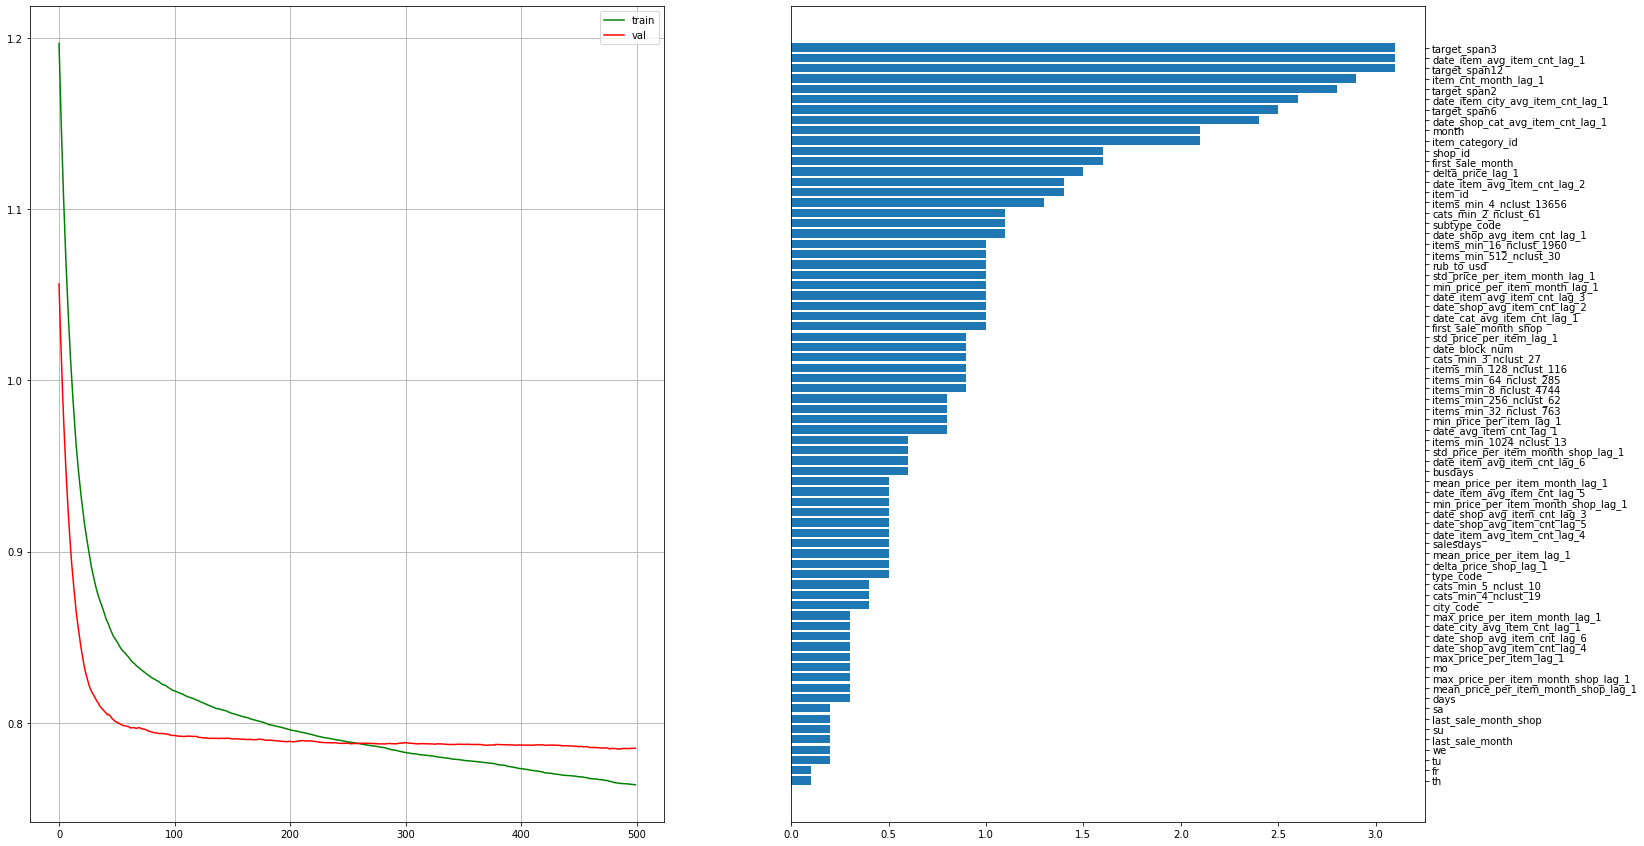

Wall time: 9min 55s


In [44]:
%%time
y_pred_train, y_pred_val, y_pred_test = LGBM(X, 'DL mean enc features 500_None_10_0.05', num_boost_round = 500, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05)

LGBM: RMSE train: 0.7644085166862907  RMSE val: 0.7829011541937101


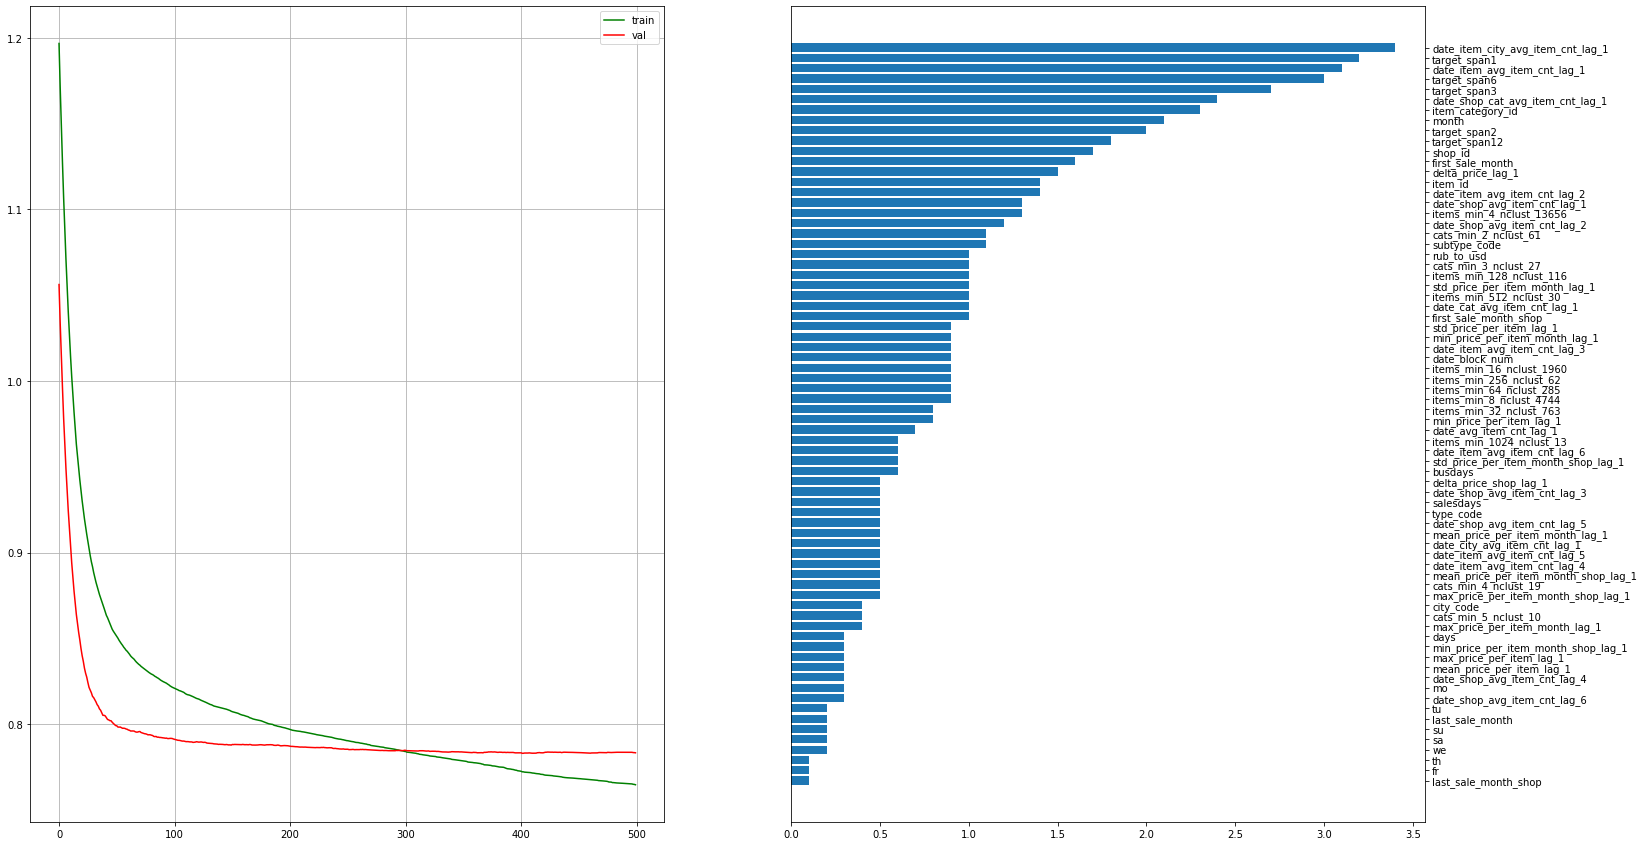

Wall time: 10min 43s


In [56]:
%%time
y_pred_train, y_pred_val, y_pred_test = LGBM(X, 'DL mean enc features 500_None_10_0.05', num_boost_round = 500, early_stopping_rounds = None, lambda_l2 = 10, learning_rate = 0.05)

[1000]	train's rmse: 0.698171	val's rmse: 0.781987
LGBM: RMSE train: 0.6972189800323111  RMSE val: 0.7801127941827182


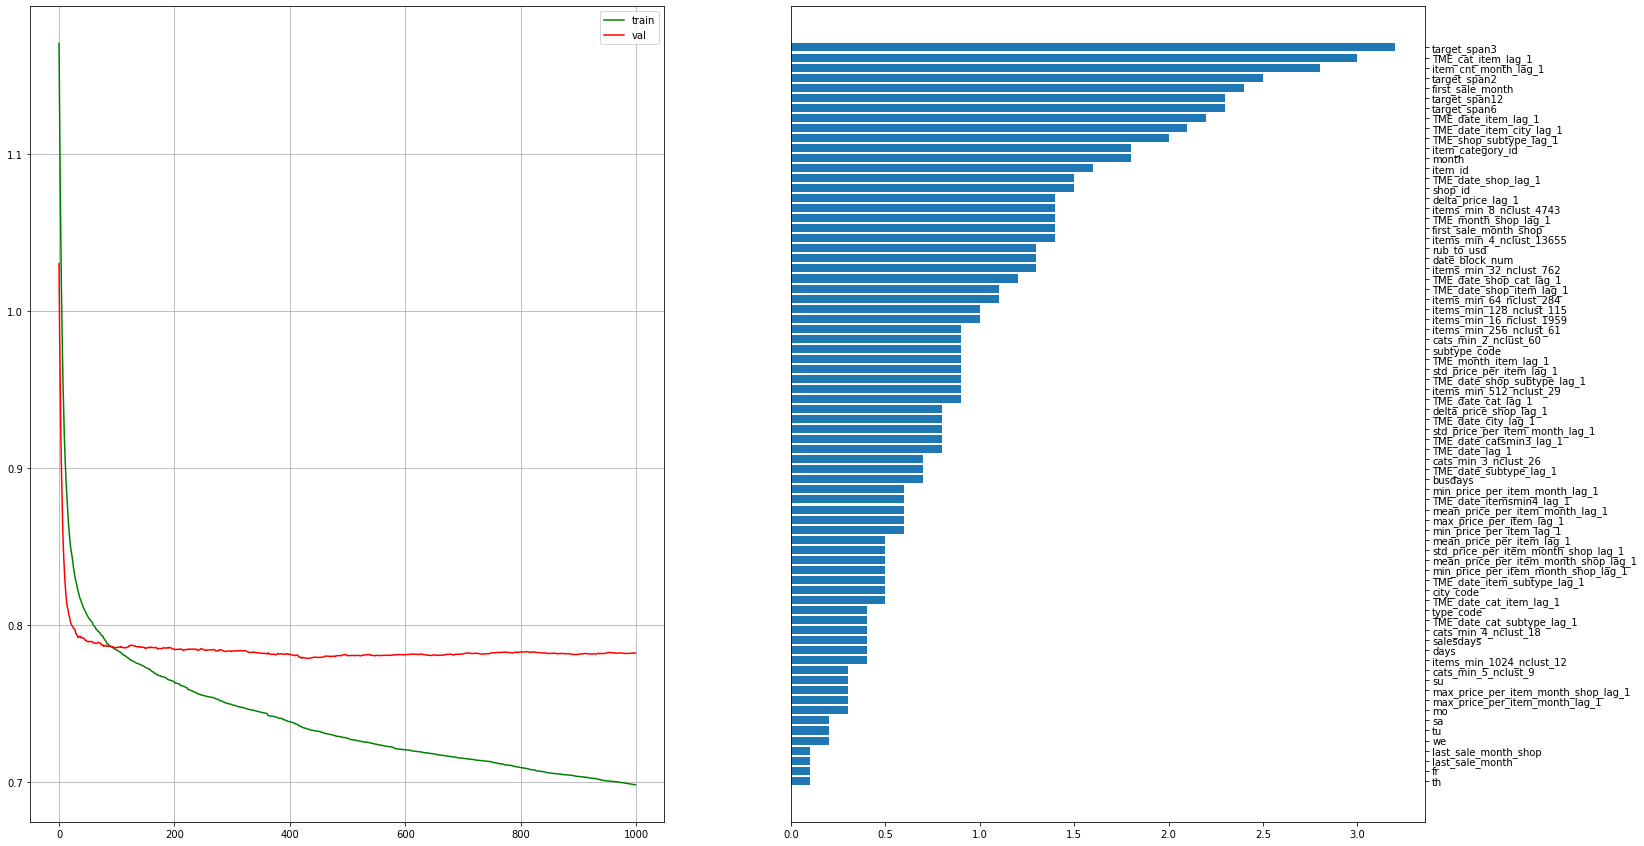

Wall time: 18min 39s


In [13]:
%%time
y_pred_train, y_pred_val, y_pred_test = LGBM(X, 'base_10000_1000_10_0.01', num_boost_round = 10000, early_stopping_rounds = 1000, lambda_l2 = 10, learning_rate = 0.01)

Training until validation scores don't improve for 2000 rounds
[1000]	train's rmse: 0.781856	val's rmse: 0.78581
[2000]	train's rmse: 0.759591	val's rmse: 0.780819
Did not meet early stopping. Best iteration is:
[2000]	train's rmse: 0.759591	val's rmse: 0.780819
LGBM: RMSE train: 0.7594066282461441  RMSE val: 0.7807072201686931


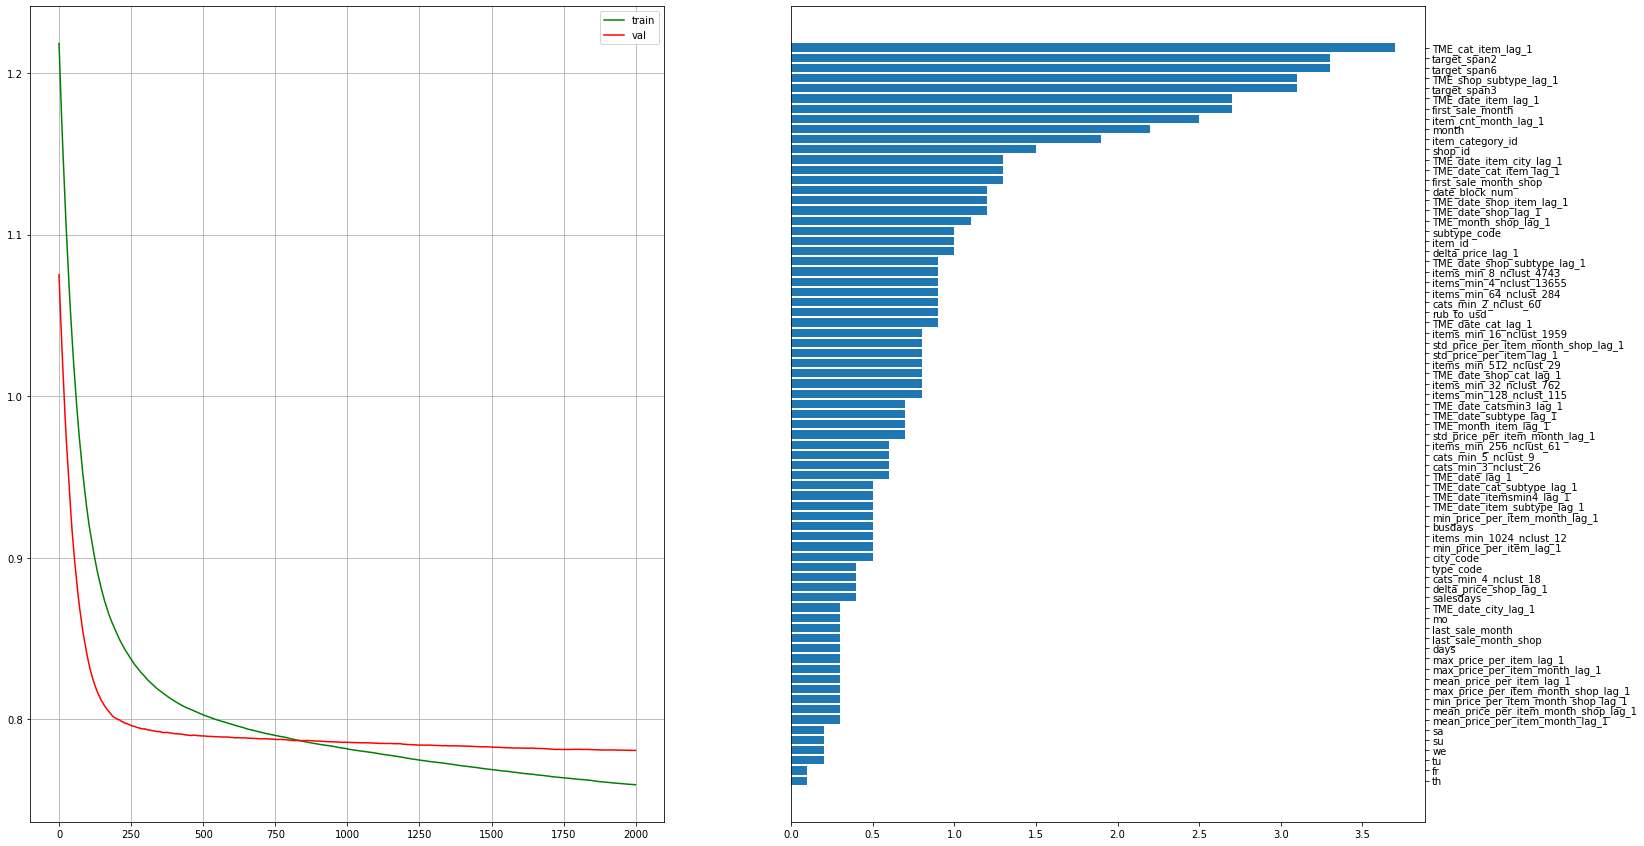

Wall time: 36min 6s


In [162]:
%%time
y_pred_train, y_pred_val, y_pred_test = LGBM(X, 'no_item_city_2000', num_boost_round = 2000, early_stopping_rounds = 2000, lambda_l2 = 10)

In [163]:
y_train = X[X.date_block_num < 33]['item_cnt_month']
y_val = X[X.date_block_num == 33]['item_cnt_month']

y_pred_train_round = y_pred_train.round()
y_pred_val_round = y_pred_val.round()
y_pred_test_round = y_pred_test.round()

In [164]:
display(np.unique(y_train, return_counts=True)[1],
        np.unique(y_pred_train_round, return_counts=True)[1],
        np.unique(y_val, return_counts=True)[1],
        np.unique(y_pred_val_round, return_counts=True)[1],
        np.unique(y_pred_test_round, return_counts=True)[1]
       )

array([6975311,  794603,  203068,   78725,   40448,   24143,   15620,
         10660,    7858,    5660,    4510,    3362,    2761,    2272,
          1821,    1527,    1311,    1175,     953,     862,    9369],
      dtype=int64)

array([7128886,  739511,  157944,   61373,   32540,   18996,   12017,
          8393,    6148,    4712,    3323,    2468,    1930,    1632,
          1191,     969,     779,     637,     654,     768,    1148],
      dtype=int64)

array([190984,  21155,   4953,   1833,    893,    511,    312,    199,
          136,    115,     74,     56,     52,     47,     40,     35,
           28,     19,     21,     12,    201], dtype=int64)

array([193912,  19686,   3977,   1486,    902,    542,    365,    253,
          148,    102,     78,     43,     30,     30,     26,     22,
           13,      8,     11,     31,     11], dtype=int64)

array([183989,  21095,   4432,   1631,    920,    651,    418,    348,
          218,    152,     95,     56,     43,     22,     29,     11,
           21,     11,     12,     43,      3], dtype=int64)

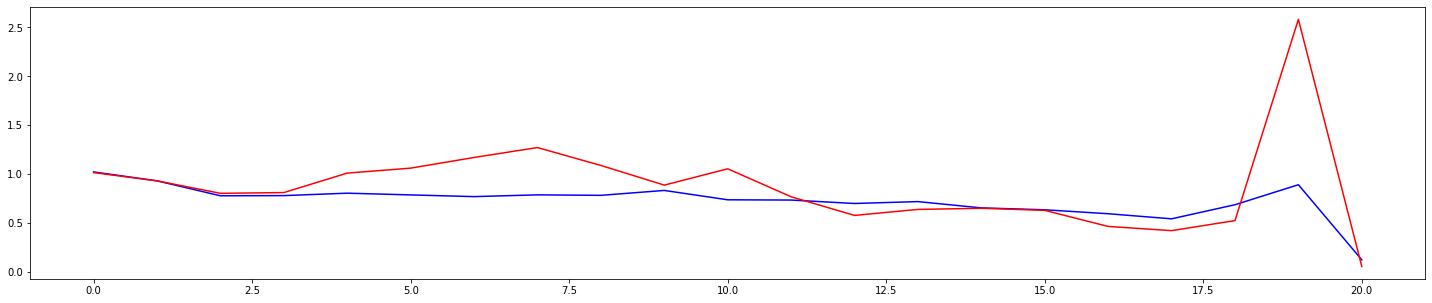

In [165]:
plt.plot(np.unique(y_pred_train_round, return_counts=True)[1]/np.unique(y_train, return_counts=True)[1], 'b')
plt.plot(np.unique(y_pred_val_round, return_counts=True)[1]/np.unique(y_val, return_counts=True)[1], 'r')
plt.show()

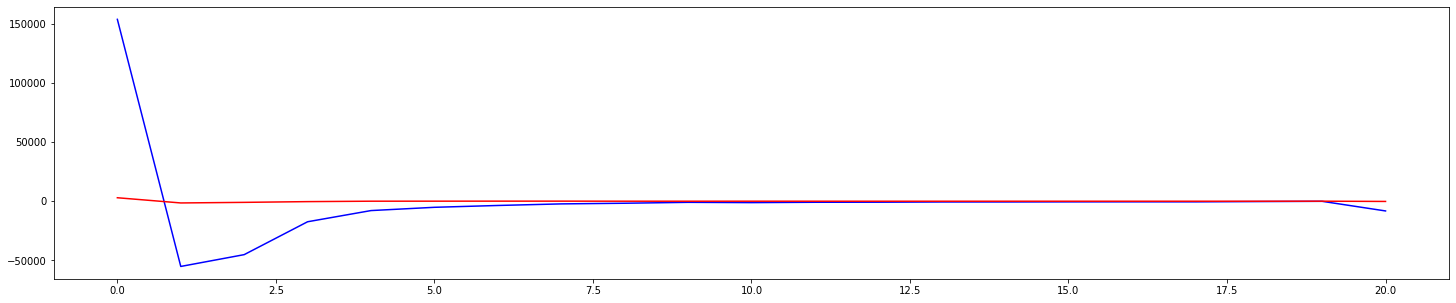

In [166]:
plt.plot(np.unique(y_pred_train_round, return_counts=True)[1] - np.unique(y_train, return_counts=True)[1], 'b')
plt.plot(np.unique(y_pred_val_round, return_counts=True)[1] -  np.unique(y_val, return_counts=True)[1], 'r')

Training until validation scores don't improve for 2000 rounds
[1000]	train's rmse: 0.783399	val's rmse: 0.7862
[2000]	train's rmse: 0.761769	val's rmse: 0.780316
Did not meet early stopping. Best iteration is:
[2000]	train's rmse: 0.761769	val's rmse: 0.780316
LGBM: RMSE train: 0.7615974380383614  RMSE val: 0.7801955656680136


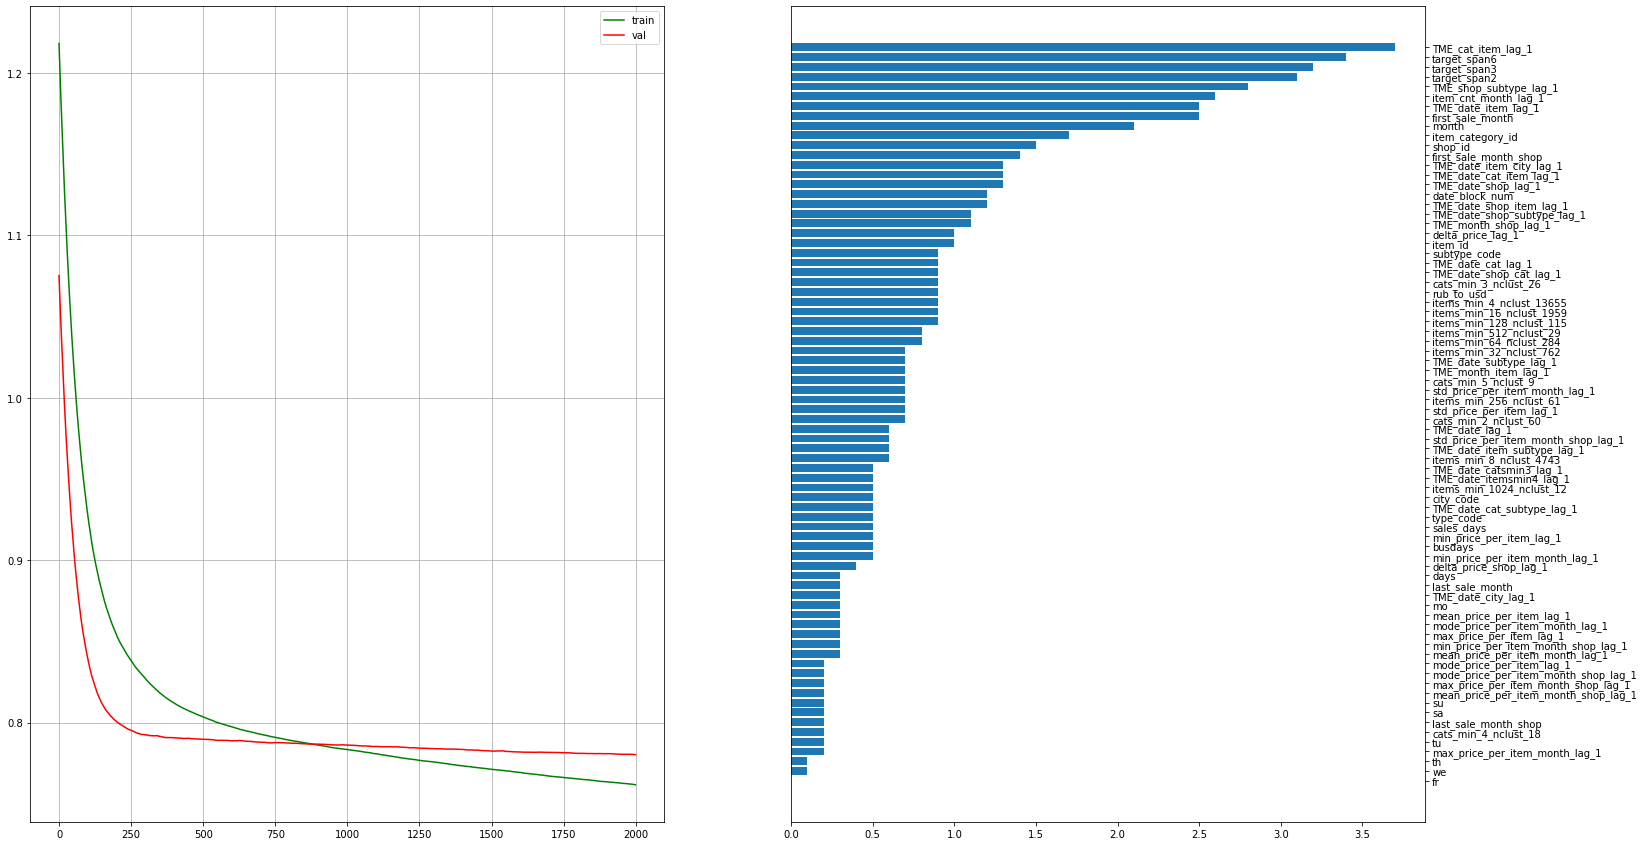

Wall time: 52min 14s


In [194]:
%%time
LGBM(X, 'no_item-city', num_boost_round = 2000, early_stopping_rounds = 2000, lambda_l2 = 10)

Training until validation scores don't improve for 2000 rounds
[1000]	train's rmse: 0.792222	val's rmse: 0.773422
[2000]	train's rmse: 0.772644	val's rmse: 0.768683
[3000]	train's rmse: 0.760534	val's rmse: 0.76645
[4000]	train's rmse: 0.750657	val's rmse: 0.764727
[5000]	train's rmse: 0.743226	val's rmse: 0.763383
[6000]	train's rmse: 0.736181	val's rmse: 0.7623
Did not meet early stopping. Best iteration is:
[6500]	train's rmse: 0.733232	val's rmse: 0.761769
LGBM: RMSE train: 0.7328850197946558  RMSE val: 0.761419789890899


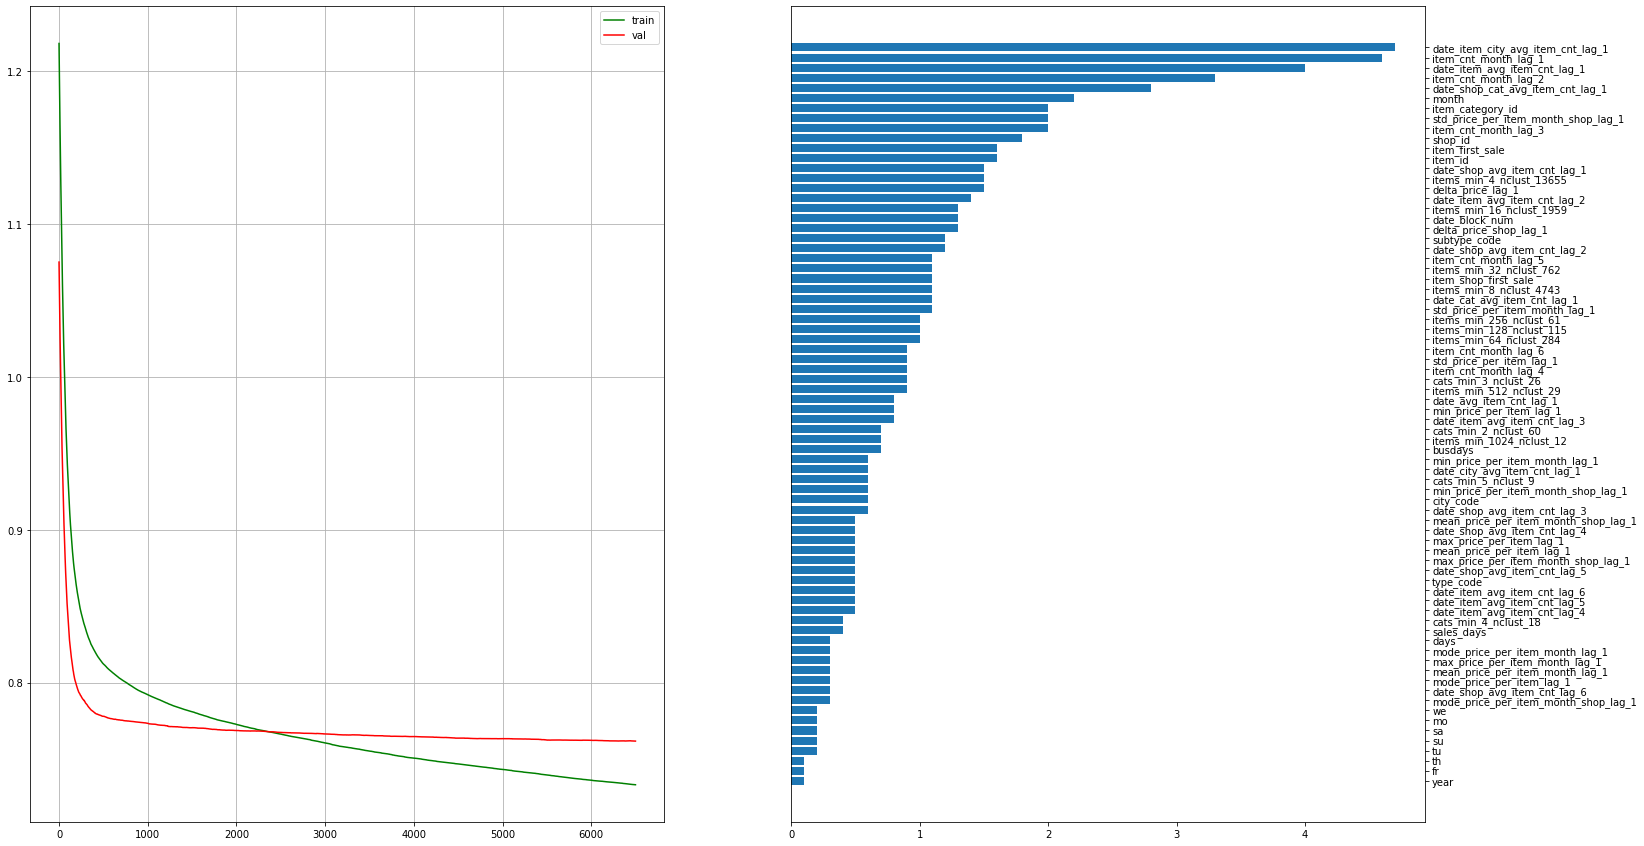

Wall time: 2h 17min 39s


In [69]:
%%time
LGBM(X, 'price aggregates lags', num_boost_round = 6500, early_stopping_rounds = 2000, lambda_l2 = 10)

Training until validation scores don't improve for 2000 rounds
[1000]	train's rmse: 0.794611	val's rmse: 0.772042
[2000]	train's rmse: 0.771568	val's rmse: 0.764906
Did not meet early stopping. Best iteration is:
[2000]	train's rmse: 0.771568	val's rmse: 0.764906
LGBM: RMSE train: 0.7714333417407537  RMSE val: 0.7647347176569707


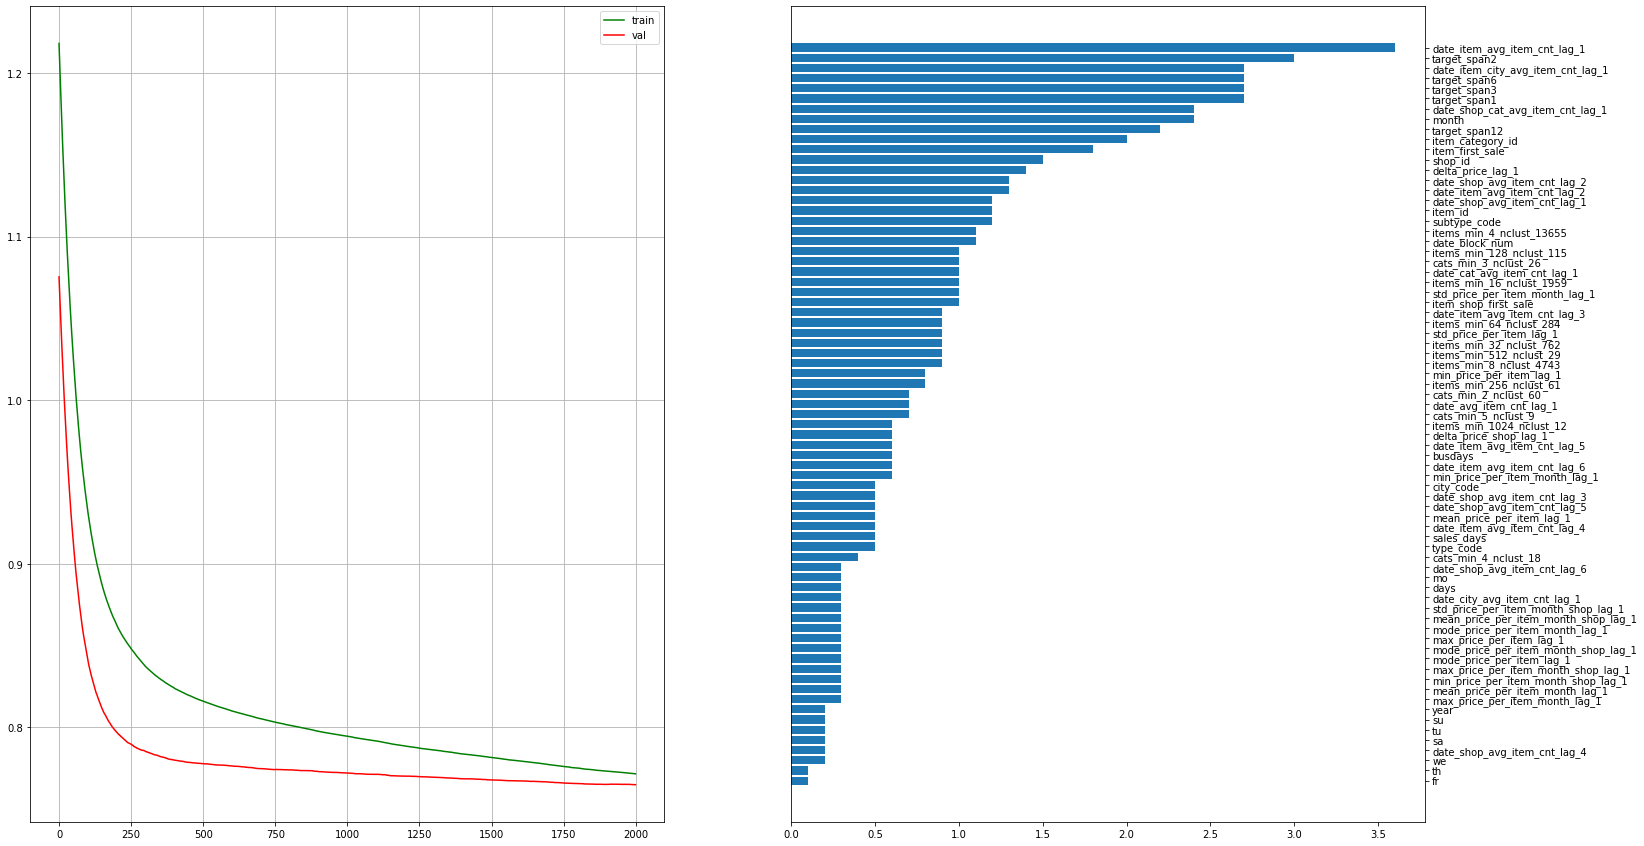

Wall time: 40min 4s


In [28]:
%%time
LGBM(X, 'repeat', num_boost_round = 2000, early_stopping_rounds = 2000, lambda_l2 = 10)

Training until validation scores don't improve for 2000 rounds
[1000]	train's rmse: 0.7983	val's rmse: 0.780694
[2000]	train's rmse: 0.776893	val's rmse: 0.775787
Did not meet early stopping. Best iteration is:
[2000]	train's rmse: 0.776893	val's rmse: 0.775787
LGBM: RMSE train: 0.7767486806369177  RMSE val: 0.7756266301802761


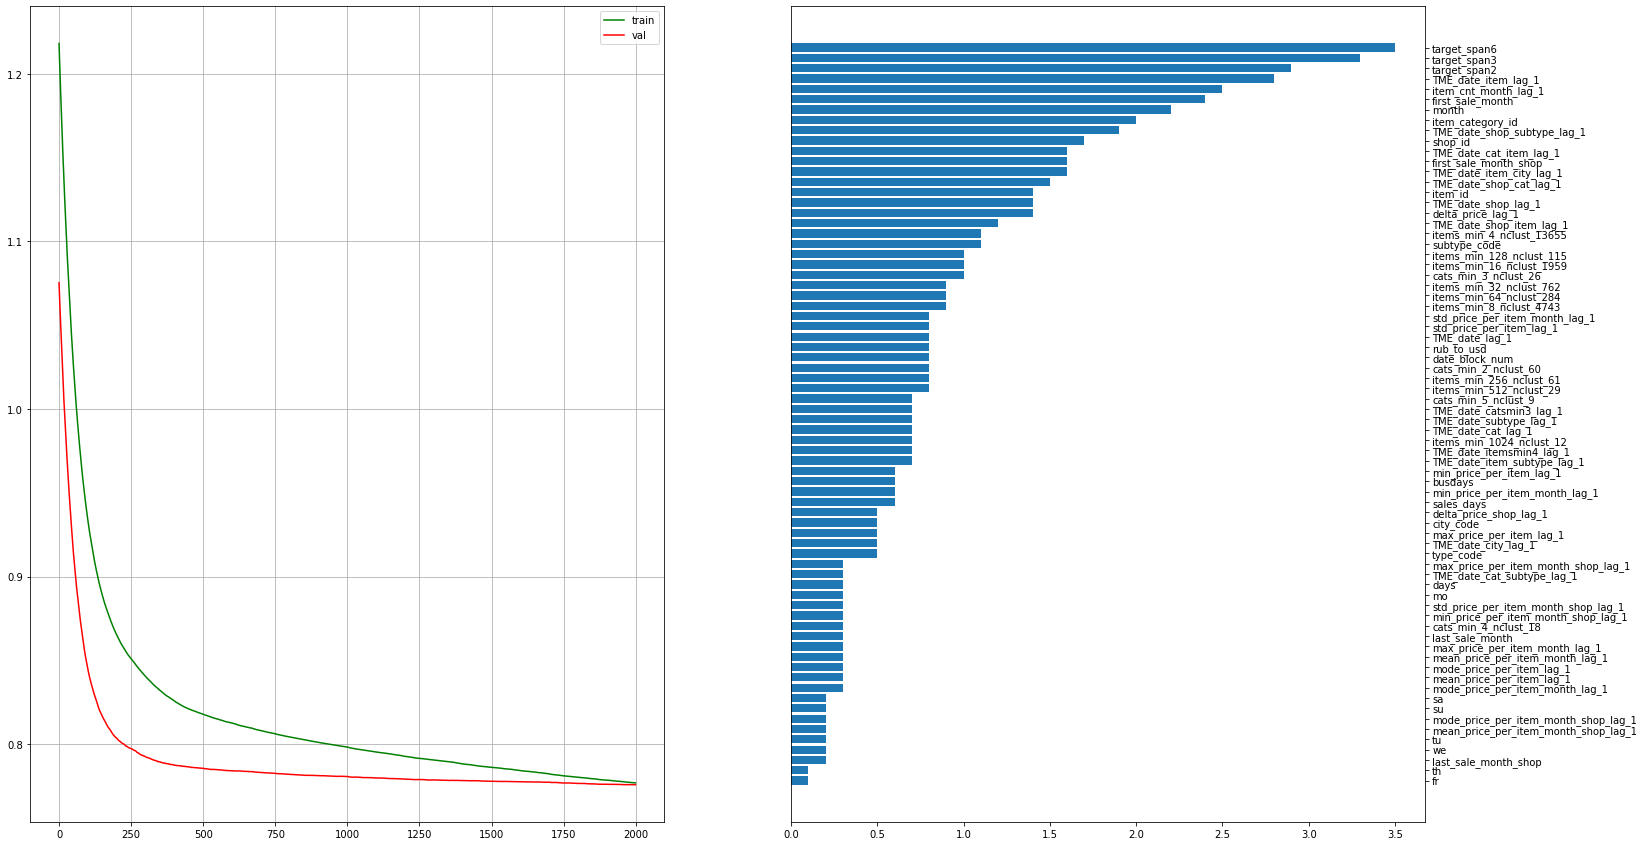

Wall time: 49min 35s


In [151]:
%%time
LGBM(X, 'new_mean_encodings', num_boost_round = 2000, early_stopping_rounds = 2000, lambda_l2 = 10)

Training until validation scores don't improve for 2000 rounds
[1000]	train's rmse: 0.768603	val's rmse: 0.776097
[2000]	train's rmse: 0.74539	val's rmse: 0.767972
Did not meet early stopping. Best iteration is:
[2000]	train's rmse: 0.74539	val's rmse: 0.767972
LGBM: RMSE train: 0.745181797988984  RMSE val: 0.7678283890145844


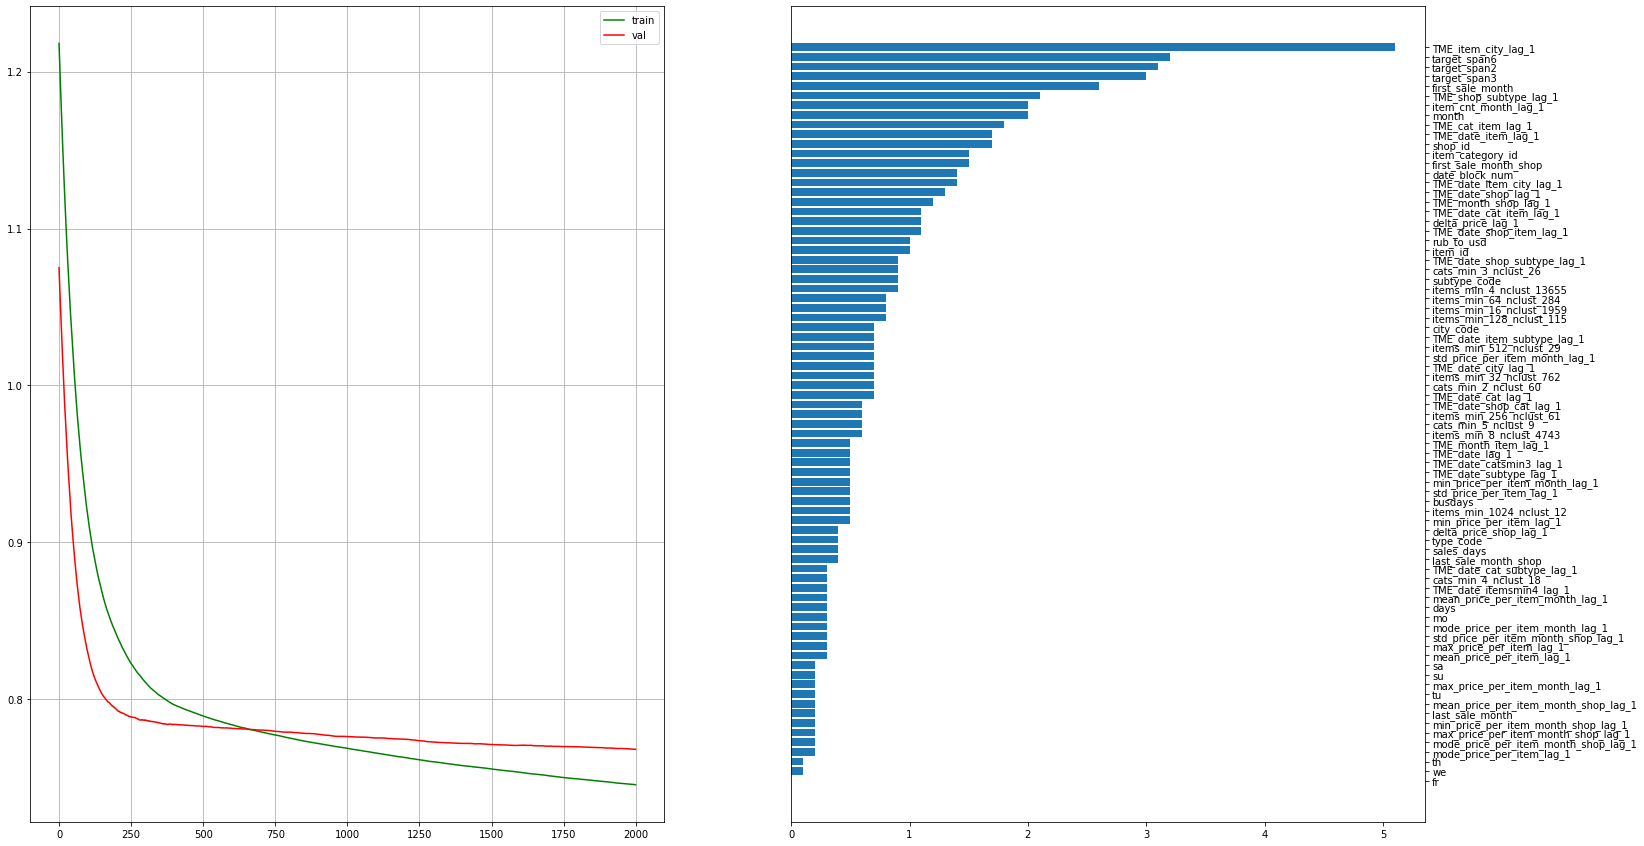

Wall time: 51min 53s


In [186]:
%%time
LGBM(X, 'more_new_mean_encodings', num_boost_round = 2000, early_stopping_rounds = 2000, lambda_l2 = 10)